In [1]:

pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

#Plotting Packages
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from plotnine import *

# Regression Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
pip install --upgrade pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv ("C://Users//alpha//Desktop//King County//Two//kc_house_data.csv")
df.describe()

# To convert the Date column into readable dates
df['date'] = pd.to_datetime(df.date)

# Checking for missing values
print (df.isnull().sum())
print (df.isnull().values.any())

df.info()

df.shape


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6 

(21597, 21)

In [5]:

# Checking for unique values in the columns
df.id.unique()
df.date.unique()
df.price.unique()
df.bedrooms.unique()
df.bathrooms.unique() 
df.floors.unique()
df.waterfront.unique()
df.view.unique()
df.condition.unique()
df.grade.unique()
df.yr_renovated.unique()
df.zipcode.unique()


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [6]:
# Changing the listing with 33 bedrooms to 3 bedrooms
for i in range (len(df)):
    if (df['bedrooms'][i] == 33) :
        df ['bedrooms'][i] = 3
        
# Assigning mean value of bedrooms and bathrooms to listings with 0 bedrooms or 0 bathrooms
import statistics

avgBed = int(statistics.mean(df['bedrooms']))        
avgBath =round (statistics.mean(df['bathrooms']))

for i in range (len(df)):
    if (df ['bedrooms'][i] == 0):
        df ['bedrooms'] [i] = avgBed
    if (df ['bathrooms'][i] == 0):
        df ['bathrooms'][i] = avgBath
        
copyDF = df # For use later in regression models


C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\562441930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#Drop rows with missing bedroom values
df.dropna(subset=['bedrooms'], inplace=True)

In [8]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [9]:
# Get the unique categories in the 'view' column
unique_categories = df['condition'].unique()

# Print the unique categories
print(unique_categories)

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [10]:
# Get the count of each unique category in the 'view' column
category_counts = df['condition'].value_counts()

# Print the category counts
print(category_counts)

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64


In [11]:
# Define a mapping from 'Poor' to 0 and 'Very Good' to 4
mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

# Apply the mapping to make the 'view' column numeric
df['condition_numeric'] = df['condition'].str.upper().map(mapping)

In [12]:
# Making Categories for conditions ranging from 1 to 5
#df['CondCategory'] = pd.Series()
#for i in range(len(df)):
#    if(df['condition'][i] == 1):
#        df['CondCategory'][i] = 'Very Poor'
#    elif(df['condition'][i] == 2):
#        df['CondCategory'][i] = 'Poor'
#    elif(df['condition'][i] == 3):
#        df['CondCategory'][i] = 'Average'
#    elif(df['condition'][i] == 4):
#        df['CondCategory'][i] = 'Good'
#    else:
#        df['CondCategory'][i] = 'Very Good'
#
#df['CondCategory'].describe()


In [13]:
#describing all the columns
for column in df.columns:
    print('Column: ', column)
    print(df[column].describe())
    
# Making a new column for price per square feet
df ['PerSqftLiving'] = round ((df['price']/ df['sqft_living']),2)


Column:  id
count    2.159700e+04
mean     4.580474e+09
std      2.876736e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64
Column:  date
count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object
Column:  price
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
Column:  bedrooms
count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64
Column:  bathrooms
count    21

In [14]:
# Define the Waterfront function
#def Waterfront(waterfront):
#    try:
#        waterfront = float(waterfront)  # Convert to float (assuming they are numeric or convertible)
#        if waterfront > 0:
#            return 'Waterfront' 
#        else:
#            return 'Not Waterfront'
#    except ValueError:
#        return 'Not Waterfront'  # Handle non-numeric or invalid values
#
# Apply the Waterfront function to create the 'Waterfront' column
#df['Waterfront'] = df['waterfront'].apply(lambda x: Waterfront(x))

In [15]:
# Define a mapping from 'NO' to 0 and 'YES' to 1
mapping = {'NO': 0, 'YES': 1}

# Apply the mapping to create a new 'encoded_feature' column
df['water_front'] = df['waterfront'].map(mapping)

In [16]:
# Define a mapping from 'NONE' to 0 and 'EXCELLENT' to 4
mapping = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}

# Apply the mapping to make the 'view' column numeric
df['view_numeric'] = df['view'].str.upper().map(mapping)

In [17]:
# Get the unique categories in the 'view' column
unique_categories = df['view'].unique()

# Print the unique categories
print(unique_categories)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [18]:
# Drop rows with missing values in 'view' and 'waterfront'
df.dropna(subset=['view', 'waterfront'], inplace=True)

In [19]:
# Get the unique categories in the 'view' column
unique_categories = df['waterfront'].unique()

# Print the unique categories
print(unique_categories)

['NO' 'YES']


In [20]:
# Get the unique categories in the 'view' column
unique_categories = df['view'].unique()

# Print the unique categories
print(unique_categories)

['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [21]:
# Check wheather houses with(without) a waterfront view have more price outliers.
#import seaborn as sns
#sns.boxplot(df['waterfront'], df['price'])
#plt.title("'Boxplot 'Waterfront' vs 'Price'")

In [22]:
# Zipcodes are further classified into sectors or bins to make grouping easier

def sector(zipcode):
    if zipcode <= 98028:
        return 'A (<= 98028)'
    elif zipcode>98028 and zipcode <= 98072:
        return 'B (>98028 & <=98072)'
    elif zipcode>98072 and zipcode<98122:
        return 'C(>98072 & <98122)'
    else:
        return 'D(>=98122)'

df['Sector'] = df['zipcode'].apply(lambda x:sector(x))

In [23]:
df.isnull().sum()


id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated          3402
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
condition_numeric    19164
PerSqftLiving            0
water_front              0
view_numeric             0
Sector                   0
dtype: int64

In [24]:
# New feature categorizing listings on whether they were renovated or not
def renovation(yr_renovated):
    if yr_renovated > 0:
        return 'Renovated' 
    else:
        return 'Original'
df['Renovation'] = df['yr_renovated'].apply(lambda x:renovation(x))


In [25]:
# Define a mapping from 'NO' to 0 and 'YES' to 1
mapping = {'Renovated': 1, 'Original': 0}

# Apply the mapping to create a new 'encoded_feature' column
df['Renovation_numeric'] = df['Renovation'].map(mapping)

In [26]:
df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated           3402
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
condition_numeric     19164
PerSqftLiving             0
water_front               0
view_numeric              0
Sector                    0
Renovation                0
Renovation_numeric        0
dtype: int64

In [27]:
df

id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
2      5631500400 2015-02-25   180000.0         2       1.00          770   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
4      1954400510 2015-02-18   510000.0         3       2.00         1680   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
...           ...        ...        ...       ...        ...          ...   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   
21592   263000018 2014-05-21   360000.0         3       2.50         1530   
21593  6600060120 2015-02-23   400000.0         4       2.50         2310   
21594  1523300141 2014-06-23   402101.0         2       0.75         1020   
21596  1523300157 2014-10-15   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...     long sqft_living15  \
1          7242     2.0         NO  NONE  ... -122.319          1690   
2         10000     1.0         NO  NONE  ... -122.233          2720   
3          5000     1.0         NO  NONE  ... -122.393          1360   
4          8080     1.0         NO  NONE  ... -122.045          1800   
5        101930     1.0         NO  NONE  ... -122.005          4760   
...         ...     ...        ...   ...  ...      ...           ...   
21591      1294     2.0         NO  NONE  ... -122.409          1330   
21592      1131     3.0         NO  NONE  ... -122.346          1530   
21593      5813     2.0         NO  NONE  ... -122.362          1830   
21594      1350     2.0         NO  NONE  ... -122.299          1020   
21596      1076     2.0         NO  NONE  ... -122.299          1020   

       sqft_lot15 condition_numeric  PerSqftLiving  water_front  view_numeric  \
1            7639               NaN         209.34          0.0           0.0   
2            8062               NaN         233.77          0.0           0.0   
3            5000               NaN         308.16          0.0           0.0   
4            7503               NaN         303.57          0.0           0.0   
5          101930               NaN         226.94          0.0           0.0   
...           ...               ...            ...          ...           ...   
21591        1265               NaN         362.60          0.0           0.0   
21592        1509               NaN         235.29          0.0           0.0   
21593        7200               NaN         173.16          0.0           0.0   
21594        2007               NaN         394.22          0.0           0.0   
21596        1357               NaN         318.63          0.0           0.0   

                     Sector  Renovation  Renovation_numeric  
1                D(>=98122)   Renovated                   1  
2              A (<= 98028)    Original                   0  
3                D(>=98122)    Original                   0  
4        C(>98072 & <98122)    Original                   0  
5      B (>98028 & <=98072)    Original                   0  
...                     ...         ...                 ...  
21591    C(>98072 & <98122)    Original                   0  
21592    C(>98072 & <98122)    Original                   0  
21593            D(>=98122)    Original                   0  
21594            D(>=98122)    Original                   0  
21596            D(>=98122)    Original                   0  

[19164 rows x 28 columns]

In [28]:
# Use the dropna method to remove rows with missing values in the specified feature
# Use the dropna method to remove all rows with any missing values 
# yr_renovated
# Replace missing values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)
df



id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
2      5631500400 2015-02-25   180000.0         2       1.00          770   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
4      1954400510 2015-02-18   510000.0         3       2.00         1680   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
...           ...        ...        ...       ...        ...          ...   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   
21592   263000018 2014-05-21   360000.0         3       2.50         1530   
21593  6600060120 2015-02-23   400000.0         4       2.50         2310   
21594  1523300141 2014-06-23   402101.0         2       0.75         1020   
21596  1523300157 2014-10-15   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...     long sqft_living15  \
1          7242     2.0         NO  NONE  ... -122.319          1690   
2         10000     1.0         NO  NONE  ... -122.233          2720   
3          5000     1.0         NO  NONE  ... -122.393          1360   
4          8080     1.0         NO  NONE  ... -122.045          1800   
5        101930     1.0         NO  NONE  ... -122.005          4760   
...         ...     ...        ...   ...  ...      ...           ...   
21591      1294     2.0         NO  NONE  ... -122.409          1330   
21592      1131     3.0         NO  NONE  ... -122.346          1530   
21593      5813     2.0         NO  NONE  ... -122.362          1830   
21594      1350     2.0         NO  NONE  ... -122.299          1020   
21596      1076     2.0         NO  NONE  ... -122.299          1020   

       sqft_lot15 condition_numeric  PerSqftLiving  water_front  view_numeric  \
1            7639               NaN         209.34          0.0           0.0   
2            8062               NaN         233.77          0.0           0.0   
3            5000               NaN         308.16          0.0           0.0   
4            7503               NaN         303.57          0.0           0.0   
5          101930               NaN         226.94          0.0           0.0   
...           ...               ...            ...          ...           ...   
21591        1265               NaN         362.60          0.0           0.0   
21592        1509               NaN         235.29          0.0           0.0   
21593        7200               NaN         173.16          0.0           0.0   
21594        2007               NaN         394.22          0.0           0.0   
21596        1357               NaN         318.63          0.0           0.0   

                     Sector  Renovation  Renovation_numeric  
1                D(>=98122)   Renovated                   1  
2              A (<= 98028)    Original                   0  
3                D(>=98122)    Original                   0  
4        C(>98072 & <98122)    Original                   0  
5      B (>98028 & <=98072)    Original                   0  
...                     ...         ...                 ...  
21591    C(>98072 & <98122)    Original                   0  
21592    C(>98072 & <98122)    Original                   0  
21593            D(>=98122)    Original                   0  
21594            D(>=98122)    Original                   0  
21596            D(>=98122)    Original                   0  

[19164 rows x 28 columns]

In [29]:
##AGE OF HOUSE
# Convert 'date_column' to datetime type if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract the year and create a new 'year_sold' column
df['year_sold'] = df['date'].dt.year

# Create a new 'age' column by subtracting 'yr_built' from 'year_sold'
df['age'] = df['year_sold'] - df['yr_built']
df.describe()

id                           date         price  \
count  1.916400e+04                          19164  1.916400e+04   
mean   4.594087e+09  2014-10-29 00:26:35.992485888  5.414490e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.800000e+04   
25%    2.124077e+09            2014-07-22 00:00:00  3.220000e+05   
50%    3.905082e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.334501e+09            2015-02-17 00:00:00  6.439625e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876912e+09                            NaN  3.709009e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  19164.000000  19164.000000  19164.000000  1.916400e+04  19164.000000   
mean       3.372887      2.117029   2082.038301  1.506174e+04      1.495173   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1920.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.072000e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   
std        0.903684      0.769241    921.918226  4.077215e+04      0.540308   

         sqft_above      yr_built  ...          long  sqft_living15  \
count  19164.000000  19164.000000  ...  19164.000000   19164.000000   
mean    1791.425433   1971.039553  ...   -122.214011    1987.221874   
min      370.000000   1900.000000  ...   -122.519000     399.000000   
25%     1200.000000   1951.000000  ...   -122.328000    1490.000000   
50%     1560.000000   1975.000000  ...   -122.231000    1840.000000   
75%     2217.750000   1997.000000  ...   -122.125000    2360.000000   
max     9410.000000   2015.000000  ...   -121.315000    6210.000000   
std      831.776073     29.388020  ...      0.140728     684.787028   

          sqft_lot15  condition_numeric  PerSqftLiving   water_front  \
count   19164.000000                0.0   19164.000000  19164.000000   
mean    12797.653882                NaN     264.418656      0.007566   
min       651.000000                NaN      87.590000      0.000000   
25%      5100.000000                NaN     182.190000      0.000000   
50%      7620.000000                NaN     244.890000      0.000000   
75%     10093.250000                NaN     318.970000      0.000000   
max    871200.000000                NaN     810.140000      1.000000   
std     27552.634083                NaN     110.264143      0.086657   

       view_numeric  Renovation_numeric     year_sold           age  
count  19164.000000        19164.000000  19164.000000  19164.000000  
mean       0.231058            0.033970   2014.321645     43.282091  
min        0.000000            0.000000   2014.000000     -1.000000  
25%        0.000000            0.000000   2014.000000     18.000000  
50%        0.000000            0.000000   2014.000000     39.000000  
75%        0.000000            0.000000   2015.000000     63.000000  
max        4.000000            1.000000   2015.000000    115.000000  
std        0.763368            0.181157      0.467120     29.389697  

[8 rows x 23 columns]

In [30]:
# Drop Columns not put to use
#df = df.drop(['date', 'sqft_living15', 'sqft_lot15' ], axis = 1)

#for column in df.columns:
#    print('Column: ', column)
#    print(df[column].describe())

#df.shape

In [31]:
# VIZ
##UNIVARIATE ANALYSIS

C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\3537427461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



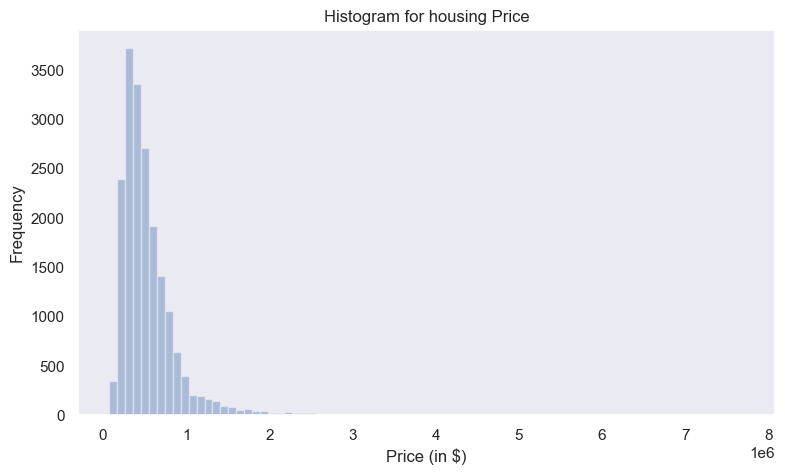

In [32]:
# price is our outcome
#histogram for price distribution
plt.figure(figsize=(9,5))
histPrice = sns.distplot(df['price'], bins=80,kde=False).set_title("Histogram for housing Price")
plt.xlabel('Price (in $)')
plt.ylabel('Frequency')
plt.grid()

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


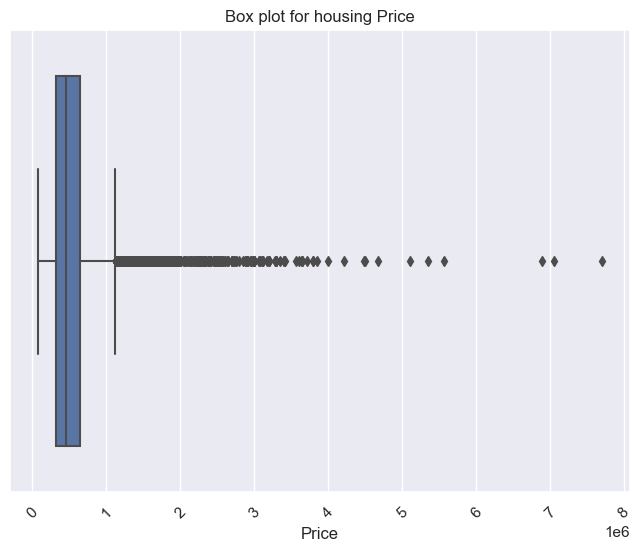

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
pricebox = sns.boxplot(x='price', data=df)
plt.title("Box plot for housing Price")
plt.xlabel('Price')  # Corrected the xlabel
plt.xticks(rotation=45)
plt.show()


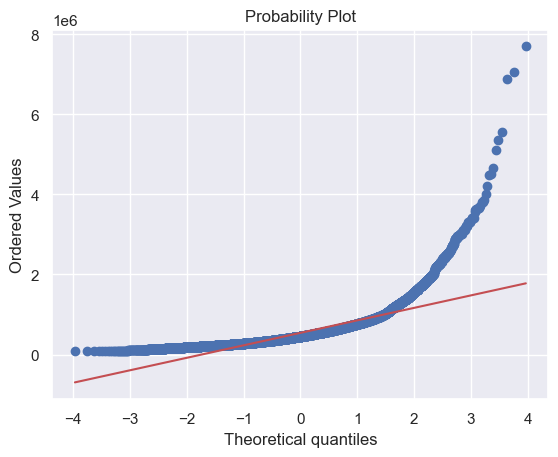

In [34]:
#QQ plot for price variable
from scipy import stats
normalProbPlot = stats.probplot(df['price'], plot=plt)

In [35]:
# Drop rows with missing 'bedrooms' values
df.dropna(subset=['bedrooms'], inplace=True)

# Check the descriptive statistics for 'bedrooms'
print("Descriptive Statistics for Bedrooms:")
print(df['bedrooms'].describe())

Descriptive Statistics for Bedrooms:
count    19164.000000
mean         3.372887
std          0.903684
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


In [36]:
# Display descriptive statistics
print(df['price'].describe())

# Calculate and display skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())


count    1.916400e+04
mean     5.414490e+05
std      3.709009e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.439625e+05
max      7.700000e+06
Name: price, dtype: float64
Skewness: 4.081095
Kurtosis: 35.301205


In [37]:
#bedrooms
#plt.figure(figsize=(6,4))
#sns.countplot(df['bedrooms'])
#print(df['bedrooms'].describe())

In [38]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_numeric',
       'PerSqftLiving', 'water_front', 'view_numeric', 'Sector', 'Renovation',
       'Renovation_numeric', 'year_sold', 'age'],
      dtype='object')


In [39]:
print(df['bedrooms'].isnull().sum())

0


c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


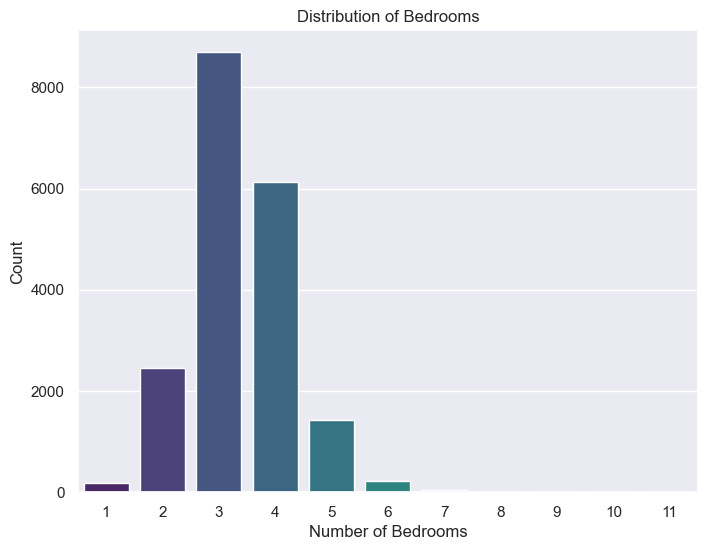

Descriptive Statistics for Bedrooms:
count    19164.000000
mean         3.372887
std          0.903684
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


In [40]:
# Create a figure and set the figure size
plt.figure(figsize=(8, 6))

# Create the countplot for 'bedrooms'
sns.countplot(data=df, x='bedrooms', palette='viridis')

# Set plot title and labels
plt.title("Distribution of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")

# Show the plot
plt.show()

# Print descriptive statistics for 'bedrooms'
print("Descriptive Statistics for Bedrooms:")
print(df['bedrooms'].describe())

In [41]:
#bathrooms
#plt.figure(figsize=(12,6))
#sns.countplot(df['bathrooms'], bins=80, kde=False);
#print(df['bathrooms'].describe())

#import seaborn as sns
#import matplotlib.pyplot as plt

# Create a figure and set the figure size
#plt.figure(figsize=(12, 6))

# Create the countplot for 'bathrooms'
#sns.countplot(data=df, x='bathrooms', bins=80, kde=False, palette='viridis')

# Set plot title and labels
#plt.title("Distribution of Bathrooms")
#plt.xlabel("Number of Bathrooms")
#plt.ylabel("Count")

# Show the plot
#plt.show()

# Print descriptive statistics for 'bathrooms'
#print("Descriptive Statistics for Bathrooms:")
#print(df['bathrooms'].describe())

count    19164.000000
mean      2082.038301
std        921.918226
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\407439663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



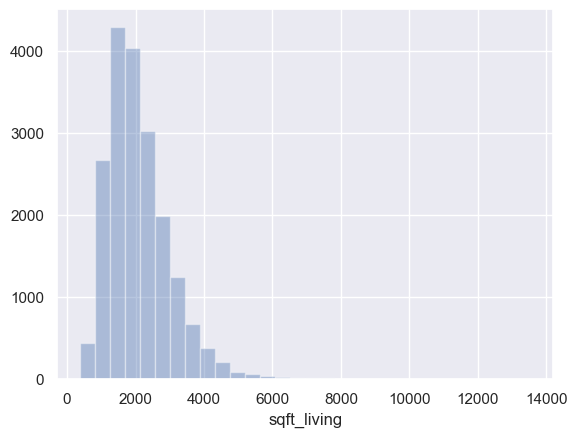

In [42]:
#sqft_living
sns.distplot(df['sqft_living'], bins=30, kde=False);
print(df['sqft_living'].describe())



C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\2409658852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



count    1.916400e+04
mean     1.506174e+04
std      4.077215e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.620000e+03
75%      1.072000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


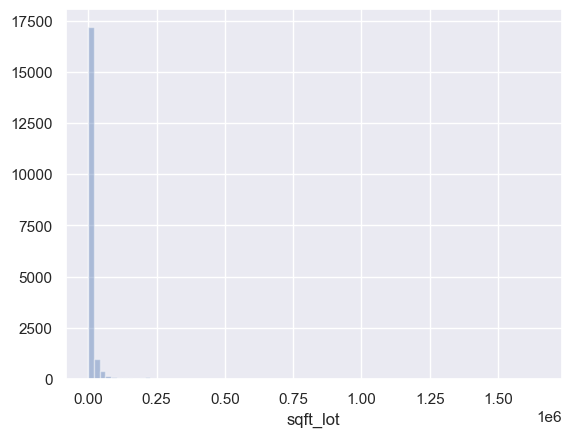

In [43]:
#sqft_lot
sns.distplot(df['sqft_lot'], bins=80, kde=False);
print(df['sqft_lot'].describe())




C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\728845956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



count    19164.000000
mean         1.495173
std          0.540308
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


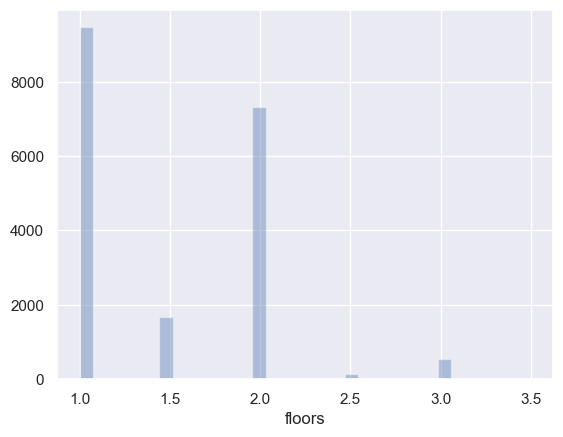

In [44]:
#floors
sns.distplot(df['floors'], kde=False);
print(df['floors'].describe())



In [45]:
#grade
#sns.distplot(df['grade'], kde=False);
#print(df['grade'].describe())
#df['grade'].value_counts()

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


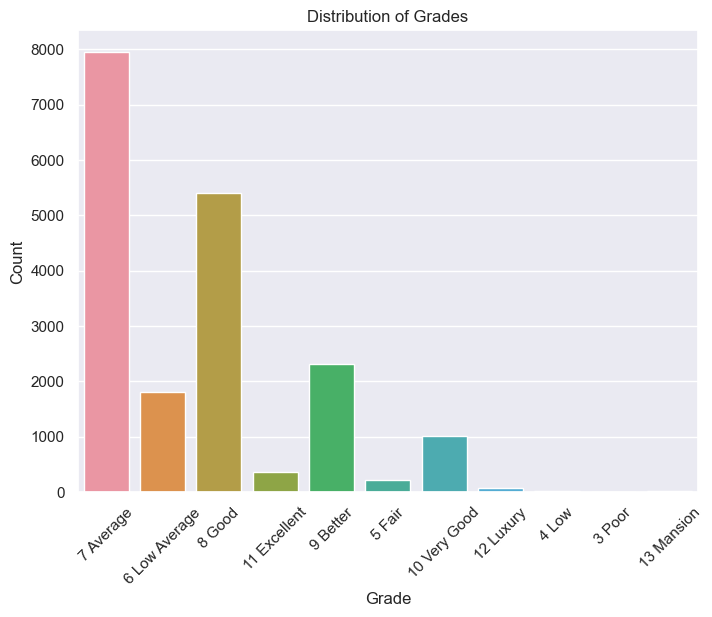

grade
7 Average        7949
8 Good           5398
9 Better         2311
6 Low Average    1804
10 Very Good     1014
11 Excellent      356
5 Fair            212
12 Luxury          81
4 Low              25
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


In [46]:
# Create a count plot for the 'grade' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade')
plt.title("Distribution of Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Display value counts for the 'grade' column
grade_counts = df['grade'].value_counts()
print(grade_counts)

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


waterfront
NO     19019
YES      145
Name: count, dtype: int64

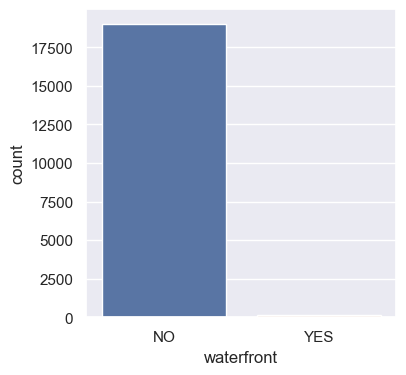

In [47]:
#waterfront
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='waterfront')
df['waterfront'].value_counts()


c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


view
NONE         17312
AVERAGE        836
GOOD           435
FAIR           291
EXCELLENT      290
Name: count, dtype: int64

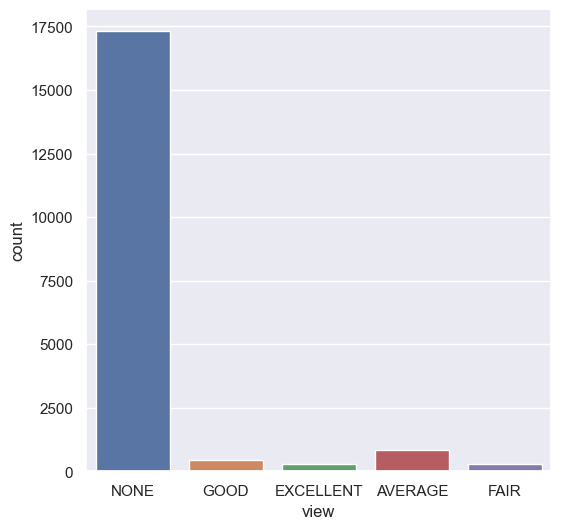

In [48]:

#view
plt.figure(figsize=(6,6))
sns.countplot(data= df, x='view')
df['view'].value_counts()


In [49]:
# Get the unique categories in the 'view' column
unique_categories = df['view'].unique()

# Print the unique categories
print(unique_categories)

['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [50]:
# Get the count of each unique category in the 'view' column
category_counts = df['view'].value_counts()

# Print the category counts
print(category_counts)

view
NONE         17312
AVERAGE        836
GOOD           435
FAIR           291
EXCELLENT      290
Name: count, dtype: int64


c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


condition
Average      12437
Good          5041
Very Good     1509
Fair           152
Poor            25
Name: count, dtype: int64

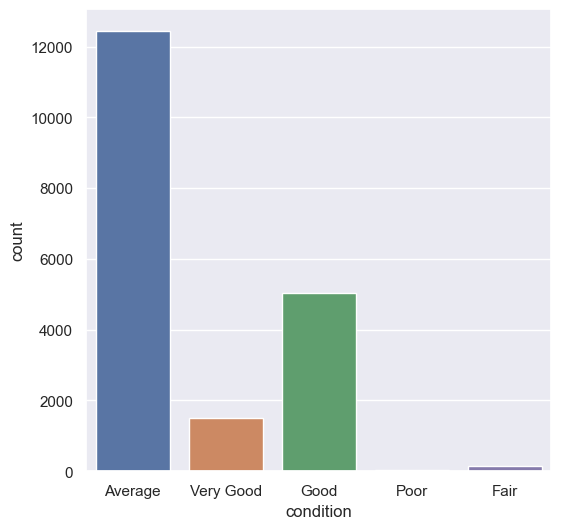

In [51]:

#condition
plt.figure(figsize=(6,6))
sns.countplot(data= df, x='condition')
df['condition'].value_counts()


In [52]:
# Uni-Analysis For single categorical variables

In [53]:
#Sqft_basement 
#sns.distplot(df['sqft_basement'],bins=30, kde=False);
#print(df['sqft_basement'].describe())



In [54]:
#import numpy as np

# Replace '?' with NaN in the 'sqft_basement' column
#df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)

# Convert the 'sqft_basement' column to a numeric data type (float)
#df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Create a histogram-like plot without KDE for the 'sqft_basement' column
#plt.figure(figsize=(8, 6))
#sns.histplot(df['sqft_basement'].dropna(), bins=30, kde=False)
#plt.title("Distribution of Basement Square Footage")
#plt.xlabel("Sqft Basement")
#plt.ylabel("Frequency")
#plt.show()

# Display descriptive statistics for the 'sqft_basement' column
#print(df['sqft_basement'].describe())

C:\Users\alpha\AppData\Local\Temp\ipykernel_16016\3515347069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



yr_renovated
0.0       18513
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1967.0        1
1934.0        1
1944.0        1
1950.0        1
1974.0        1
Name: count, Length: 70, dtype: int64

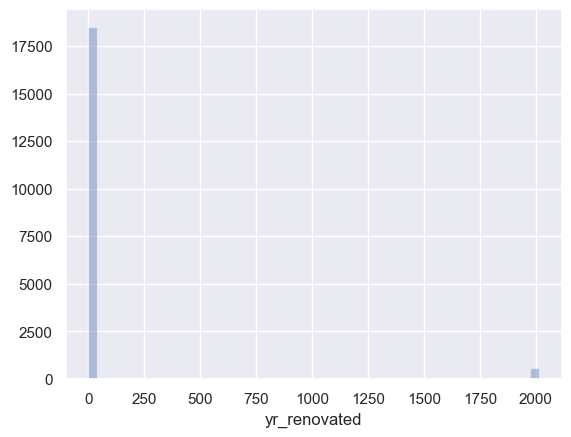

In [55]:
#yr_renovated
sns.distplot(df['yr_renovated'], bins=50, kde=False);
df['yr_renovated'].value_counts()

In [56]:
# VIZ
##BI-MULTI(VARIATE) ANALYSES

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '7 Average'),
  Text(1, 0, '6 Low Average'),
  Text(2, 0, '8 Good'),
  Text(3, 0, '11 Excellent'),
  Text(4, 0, '9 Better'),
  Text(5, 0, '5 Fair'),
  Text(6, 0, '10 Very Good'),
  Text(7, 0, '12 Luxury'),
  Text(8, 0, '4 Low'),
  Text(9, 0, '3 Poor'),
  Text(10, 0, '13 Mansion')])

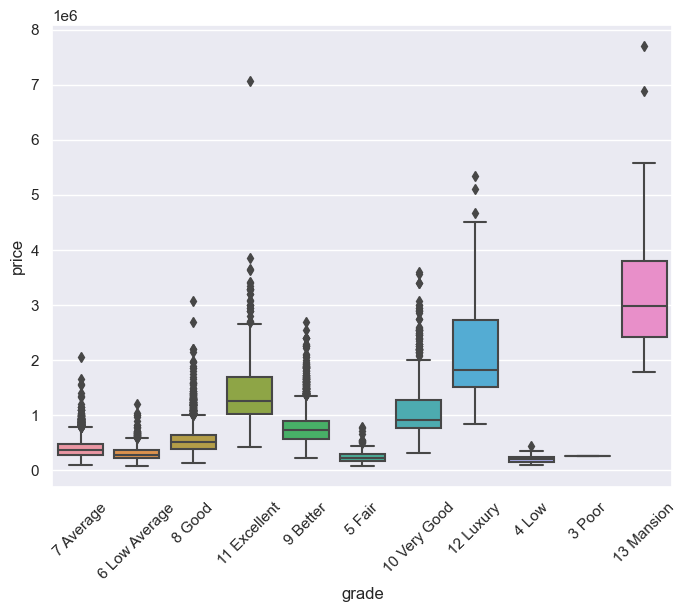

In [57]:
# Grade-Price boxplot 
colGrade = 'grade'
data = pd.concat([df['price'], df[colGrade]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=colGrade, y="price", data=data)
plt.xticks(rotation=45)



c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


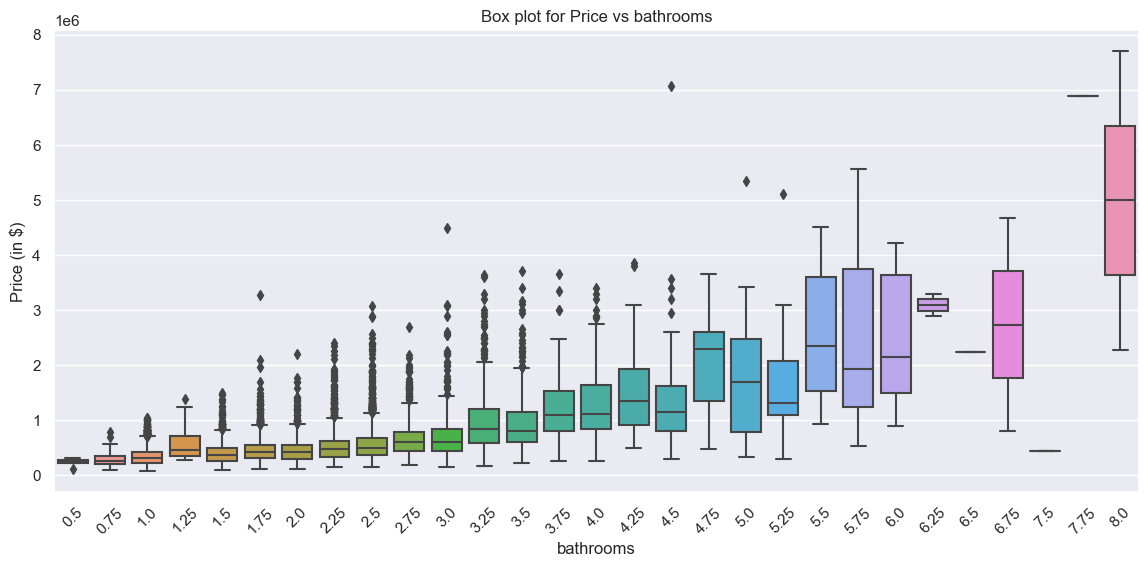

bathrooms
2.50    4828
1.00    3402
1.75    2713
2.25    1779
2.00    1718
1.50    1279
2.75    1038
3.00     661
3.50     655
3.25     517
3.75     136
4.00     121
4.50      91
4.25      72
0.75      65
4.75      22
5.00      17
5.25      11
5.50      10
1.25       8
6.00       5
0.50       4
5.75       3
6.75       2
8.00       2
6.25       2
7.50       1
7.75       1
6.50       1
Name: count, dtype: int64


In [58]:

colBathrooms = 'bathrooms'
data = pd.concat([df['price'], df[colBathrooms]], axis=1)

plt.figure(figsize=(14, 6))
sns.boxplot(x=colBathrooms, y="price", data=data)
plt.title(f"Box plot for Price vs {colBathrooms}")
plt.xlabel(colBathrooms)
plt.ylabel("Price (in $)")
plt.xticks(rotation=45)
plt.show()

# Display value counts for the 'bathrooms' column
bathrooms_counts = df[colBathrooms].value_counts()
print(bathrooms_counts)



In [59]:
# Zipcode-Price boxplot 
#colZipCode= 'zipcode'
#df = pd.concat([df['price'], df[colZipCode]], axis=1)
#f, ax = plt.subplots(figsize=(14, 6))
#fig = sns.boxplot(x=colZipCode, y="price", df=df)
#plt.xticks(rotation=90)
#df['zipcode'].value_counts()
# Print the column names to see if 'zipcode' is present
print(df.columns)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_numeric',
       'PerSqftLiving', 'water_front', 'view_numeric', 'Sector', 'Renovation',
       'Renovation_numeric', 'year_sold', 'age'],
      dtype='object')


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_numeric',
       'PerSqftLiving', 'water_front', 'view_numeric', 'Sector', 'Renovation',
       'Renovation_numeric', 'year_sold', 'age'],
      dtype='object')

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


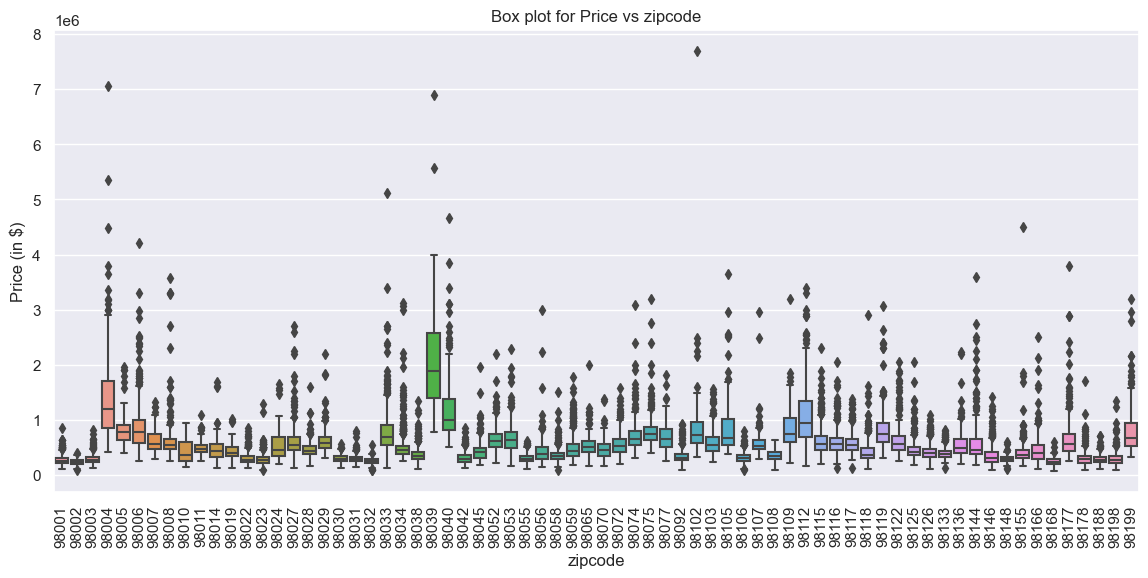

zipcode
98103    539
98038    525
98115    513
98052    506
98117    495
        ... 
98102     89
98010     87
98024     72
98148     51
98039     45
Name: count, Length: 70, dtype: int64


In [60]:

colZipCode = 'zipcode'
data = pd.concat([df['price'], df[colZipCode]], axis=1)

plt.figure(figsize=(14, 6))
sns.boxplot(x=colZipCode, y="price", data=data)
plt.title(f"Box plot for Price vs {colZipCode}")
plt.xlabel(colZipCode)
plt.ylabel("Price (in $)")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

# Display value counts for the 'zipcode' column
zipcode_counts = df[colZipCode].value_counts()
print(zipcode_counts)

c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


yr_built
2014    495
2006    404
2005    393
2003    371
2007    370
       ... 
1901     27
1933     26
1902     24
1935     22
1934     19
Name: count, Length: 116, dtype: int64

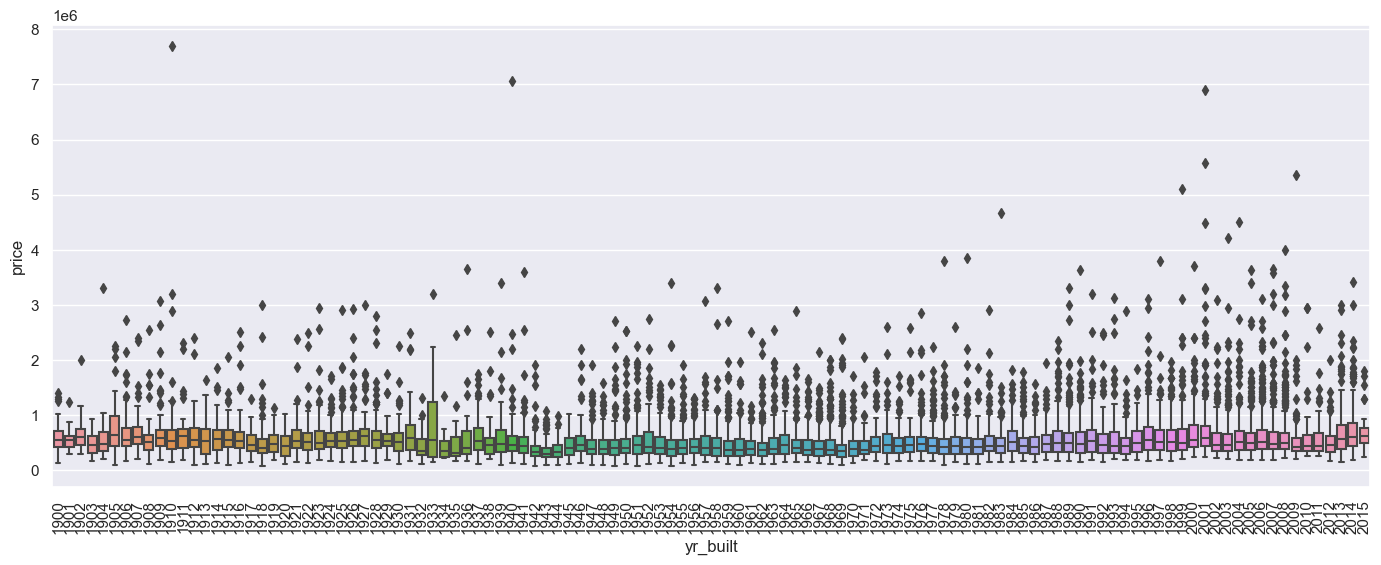

In [61]:
# Year Built-Price boxplot
colYrBuilt = 'yr_built'
data = pd.concat([df['price'], df[colYrBuilt]], axis=1)
f, ax = plt.subplots(figsize=(17, 6))
fig = sns.boxplot(x=colYrBuilt, y="price", data=data)
plt.xticks(rotation=90)
df['yr_built'].value_counts()




c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\alpha\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


view
NONE         17312
AVERAGE        836
GOOD           435
FAIR           291
EXCELLENT      290
Name: count, dtype: int64

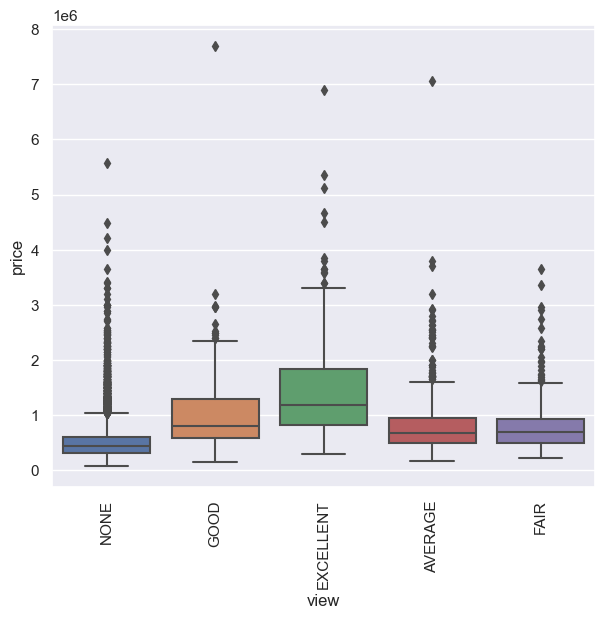

In [62]:
# View-Price boxplot
colView = 'view'
data = pd.concat([df['price'], df[colView]], axis=1)
f, ax = plt.subplots(figsize=(7, 6))
fig = sns.boxplot(x=colView, y="price", data=data)
plt.xticks(rotation=90)
df['view'].value_counts()



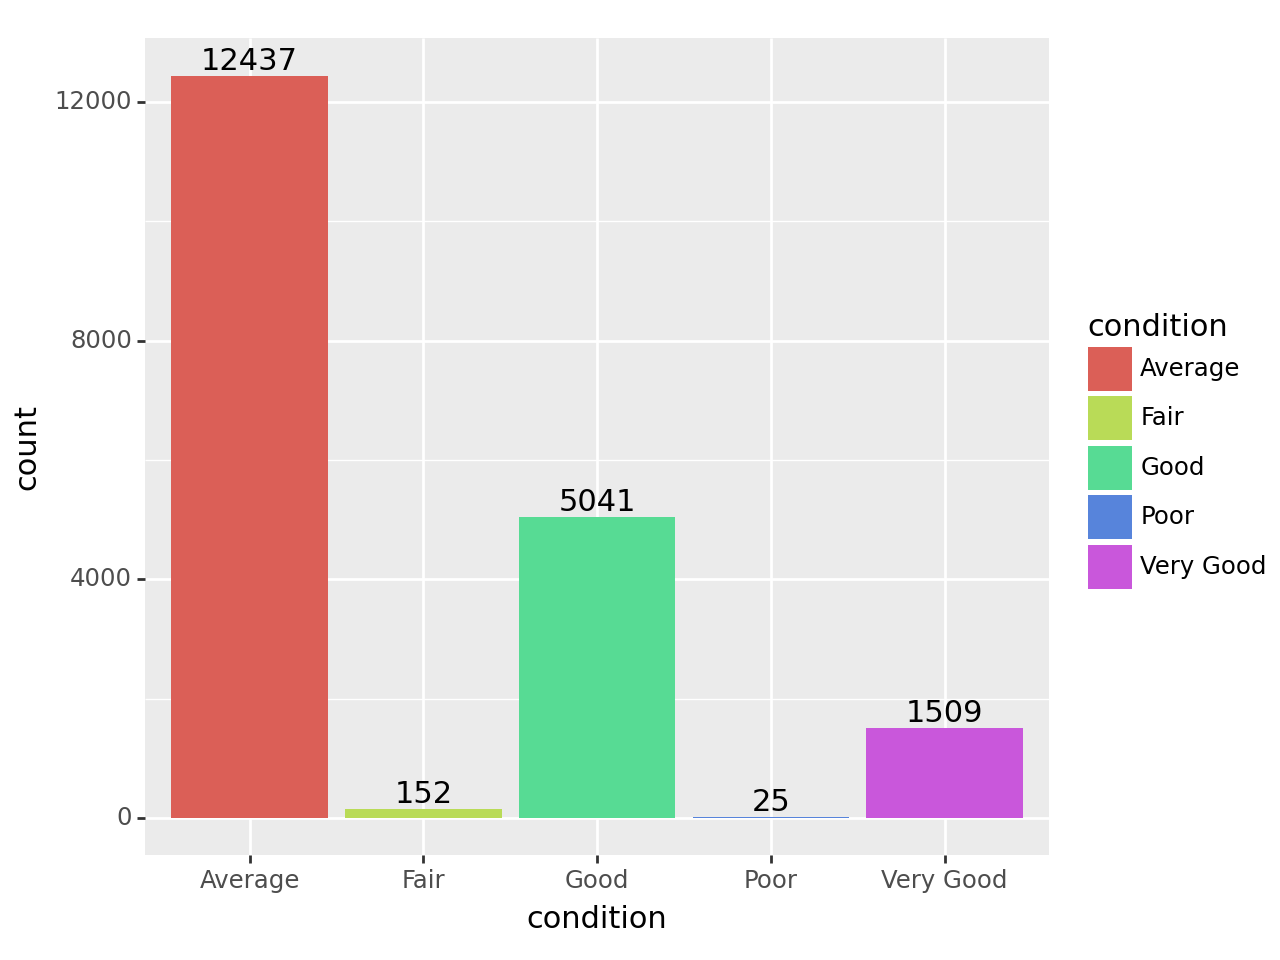

<Figure Size: (640 x 480)>

In [63]:
# Plots count of condition of a house
(ggplot(df, aes('condition', fill='condition'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

In [64]:
# Map visualisation Packages
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

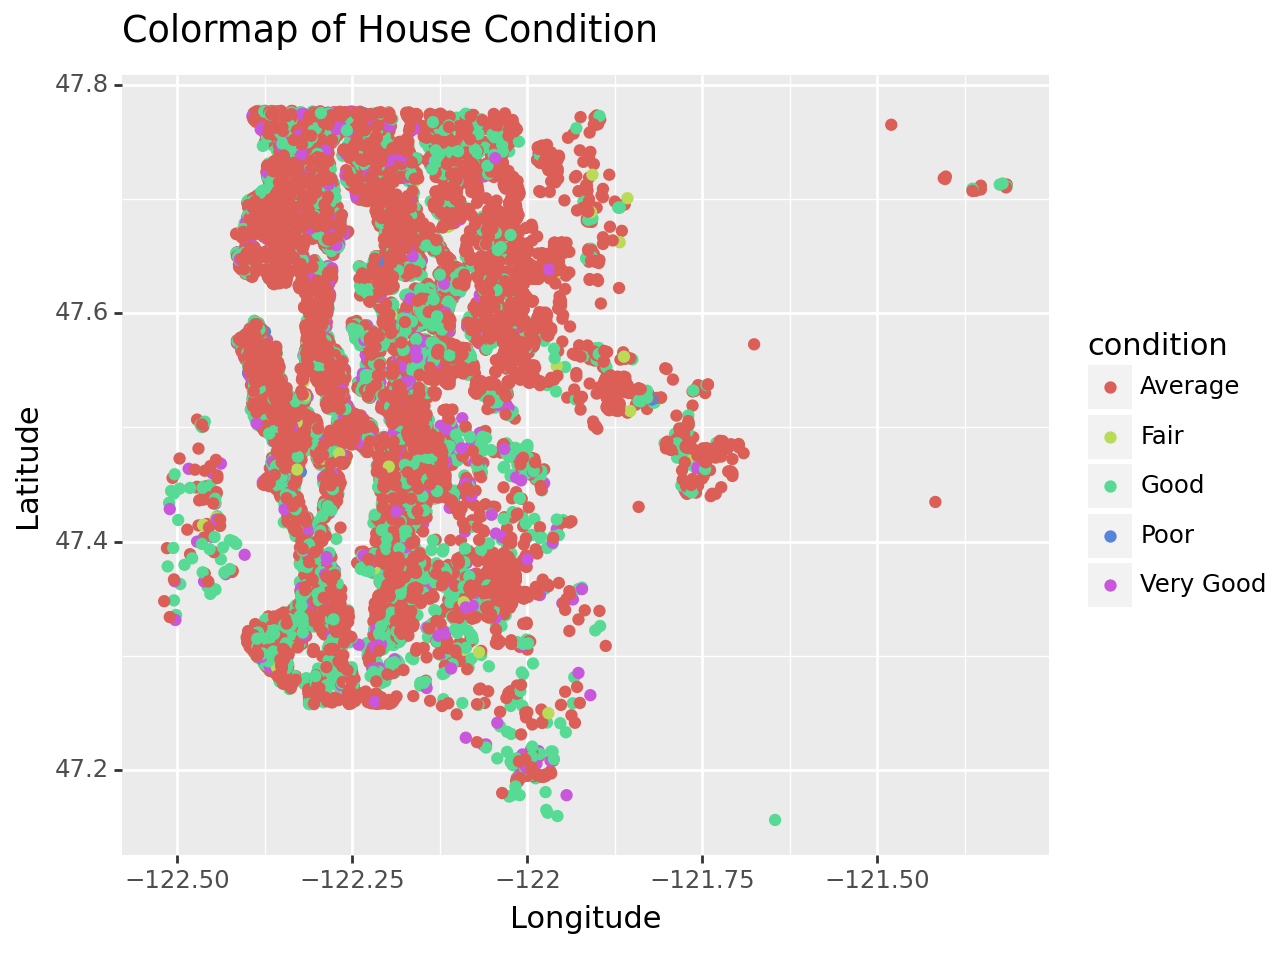

<Figure Size: (640 x 480)>

In [65]:
# Colormap of House Condition
(ggplot(df)
 + aes(x='long', y='lat', color='condition')
 + geom_point()
 + labs(title='Colormap of House Condition', x='Longitude', y='Latitude')
)




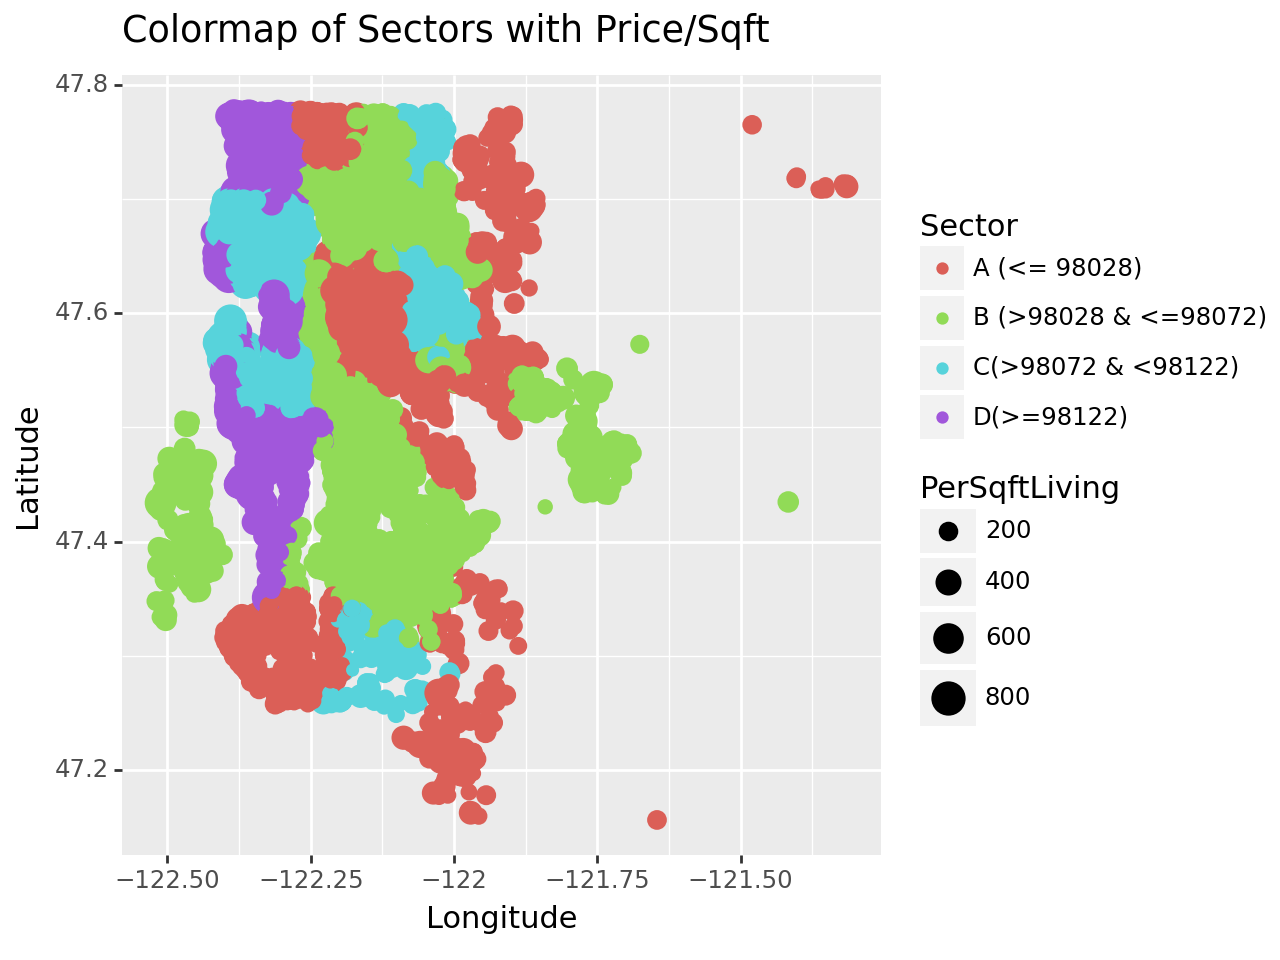

<Figure Size: (640 x 480)>

In [66]:
# Colormap of Sectors with PerSqftPrice
(ggplot(df)
 + aes(x='long', y='lat', color='Sector', size = 'PerSqftLiving')
 + geom_point()
 + labs(title='Colormap of Sectors with Price/Sqft', x='Longitude', y='Latitude')
)

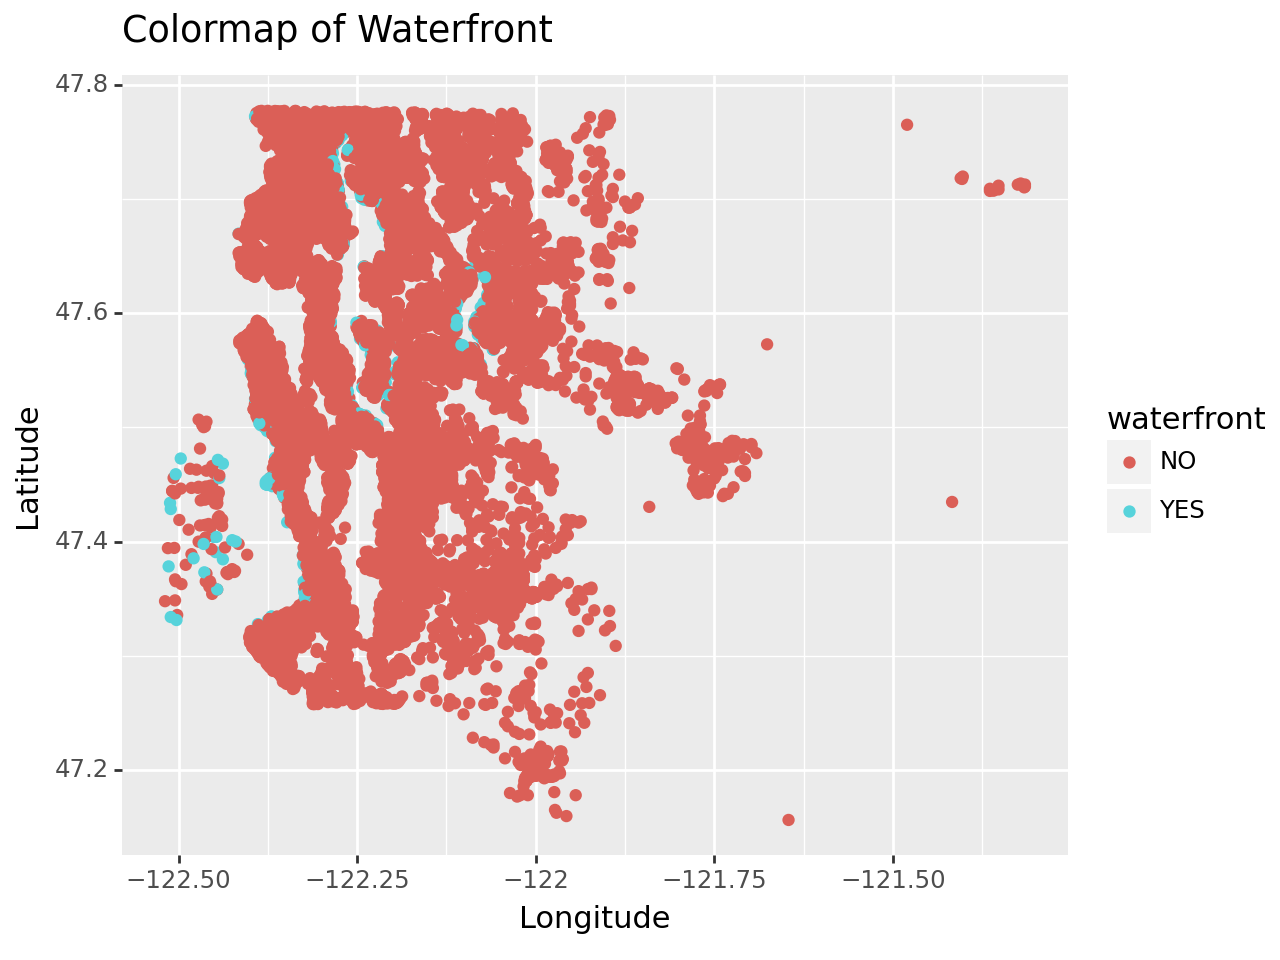

<Figure Size: (640 x 480)>

In [67]:
# Colormap of Waterfront
(ggplot(df)
 + aes(x='long', y='lat', color='waterfront')
 + geom_point()
 + labs(title='Colormap of Waterfront', x='Longitude', y='Latitude')
 )



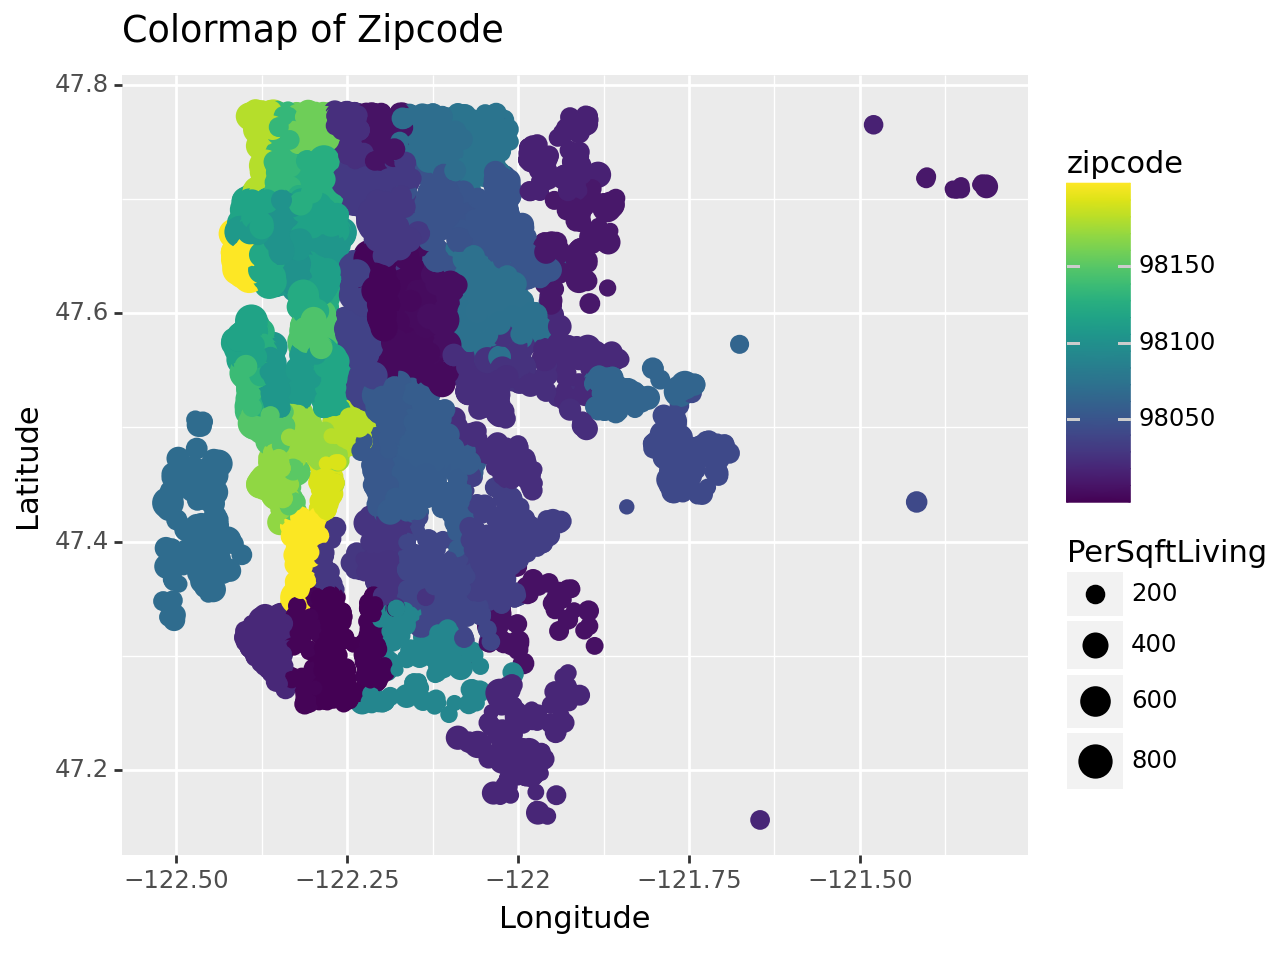

<Figure Size: (640 x 480)>

In [68]:
#Zipcode colormap of listing with Price/Sqft markers

(ggplot(df)
 + aes(x='long', y='lat', color='zipcode', size = 'PerSqftLiving')
 + geom_point()
 + labs(title='Colormap of Zipcode', x='Longitude', y='Latitude')
 )



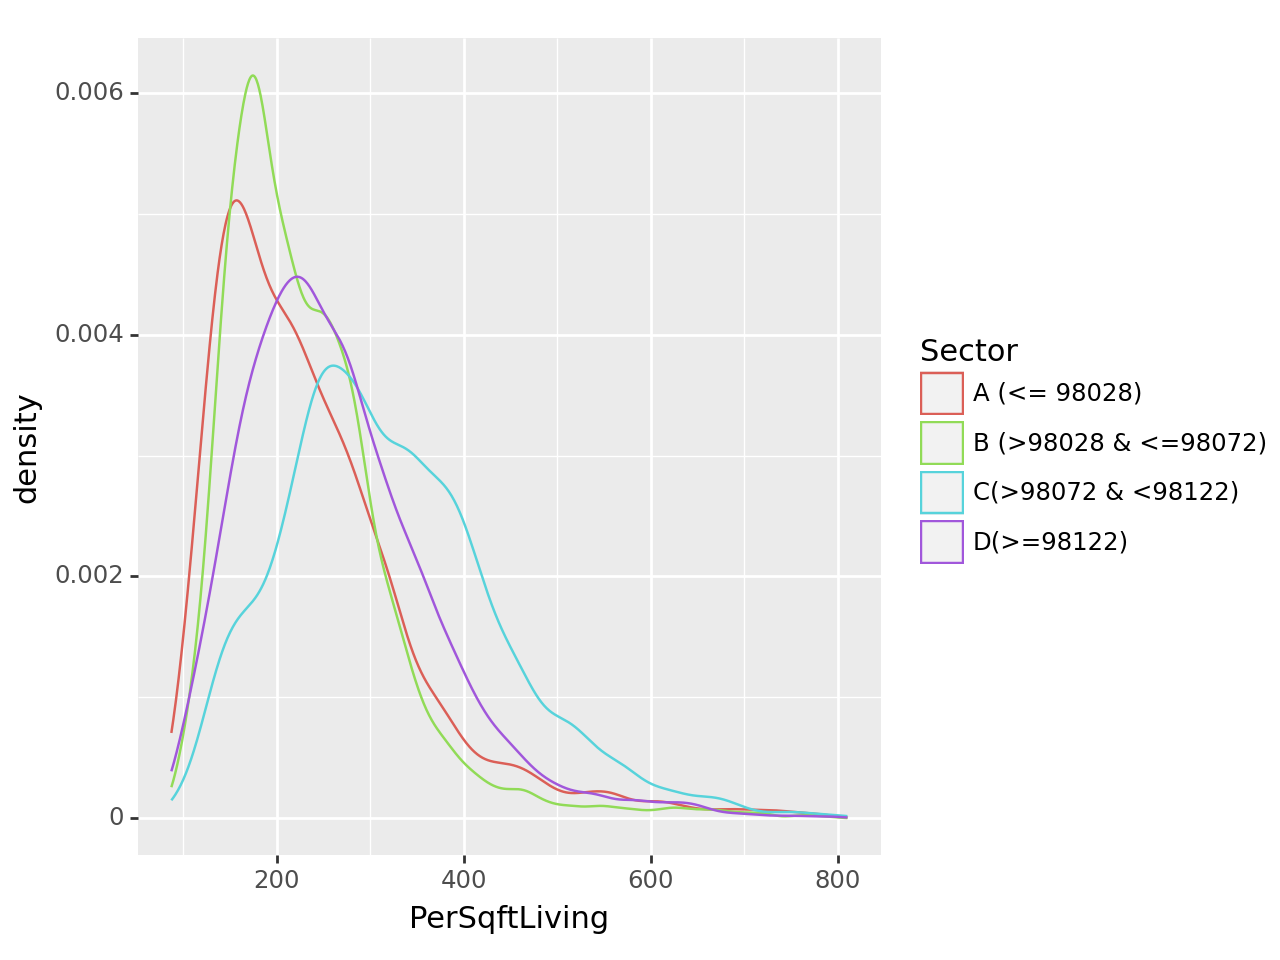

<Figure Size: (640 x 480)>

In [69]:
# Plot with Price/Sqft and Sectors
ggplot(df, aes(x='PerSqftLiving', color='Sector')) + \
    geom_density()



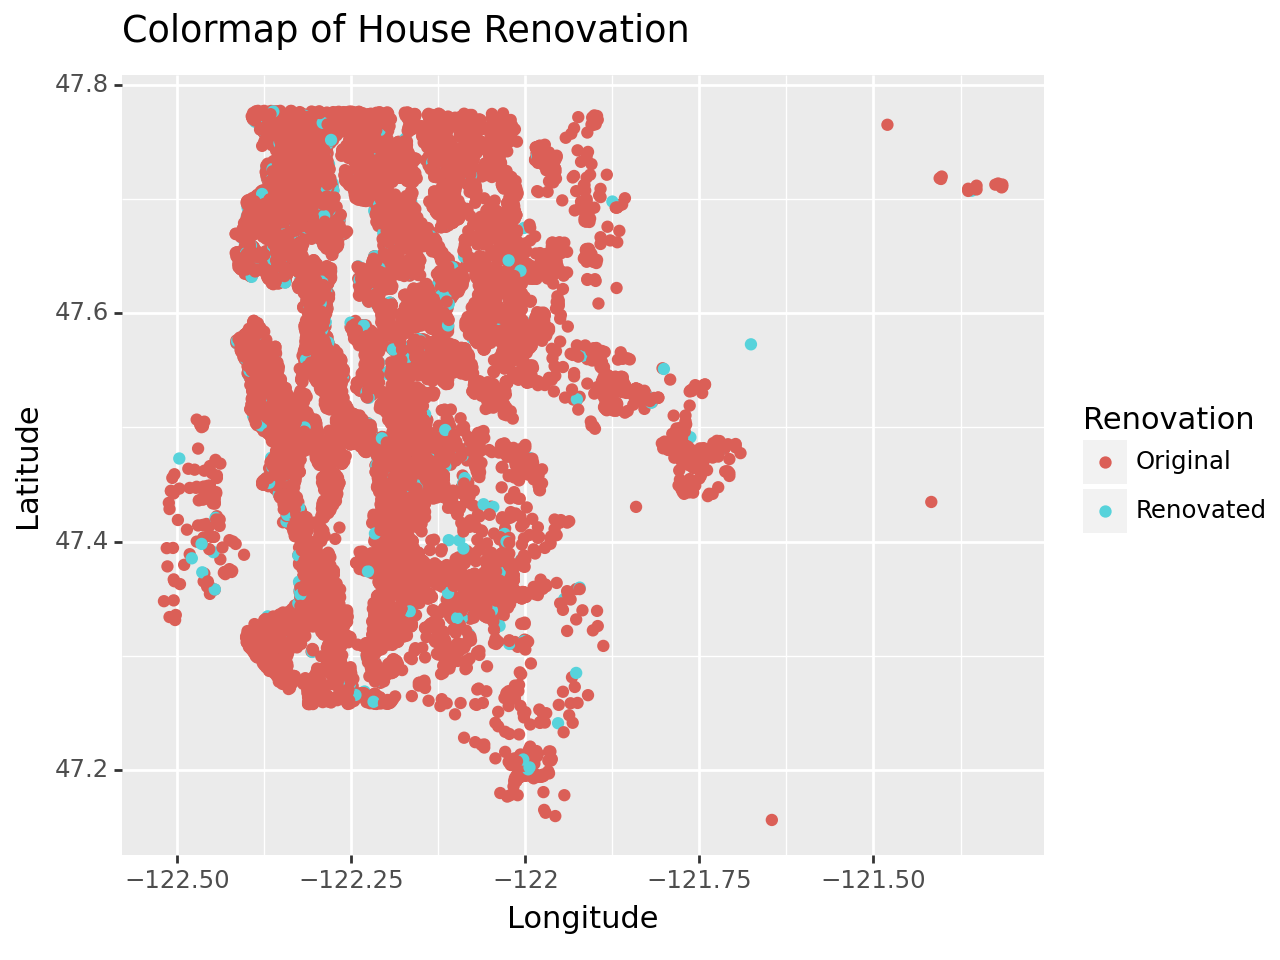

<Figure Size: (640 x 480)>

In [70]:
# Colormap of House Renovation
(ggplot(df)
 + aes(x='long', y='lat', color = 'Renovation')
 + geom_point()
 + labs(title='Colormap of House Renovation', x='Longitude', y='Latitude')
 )

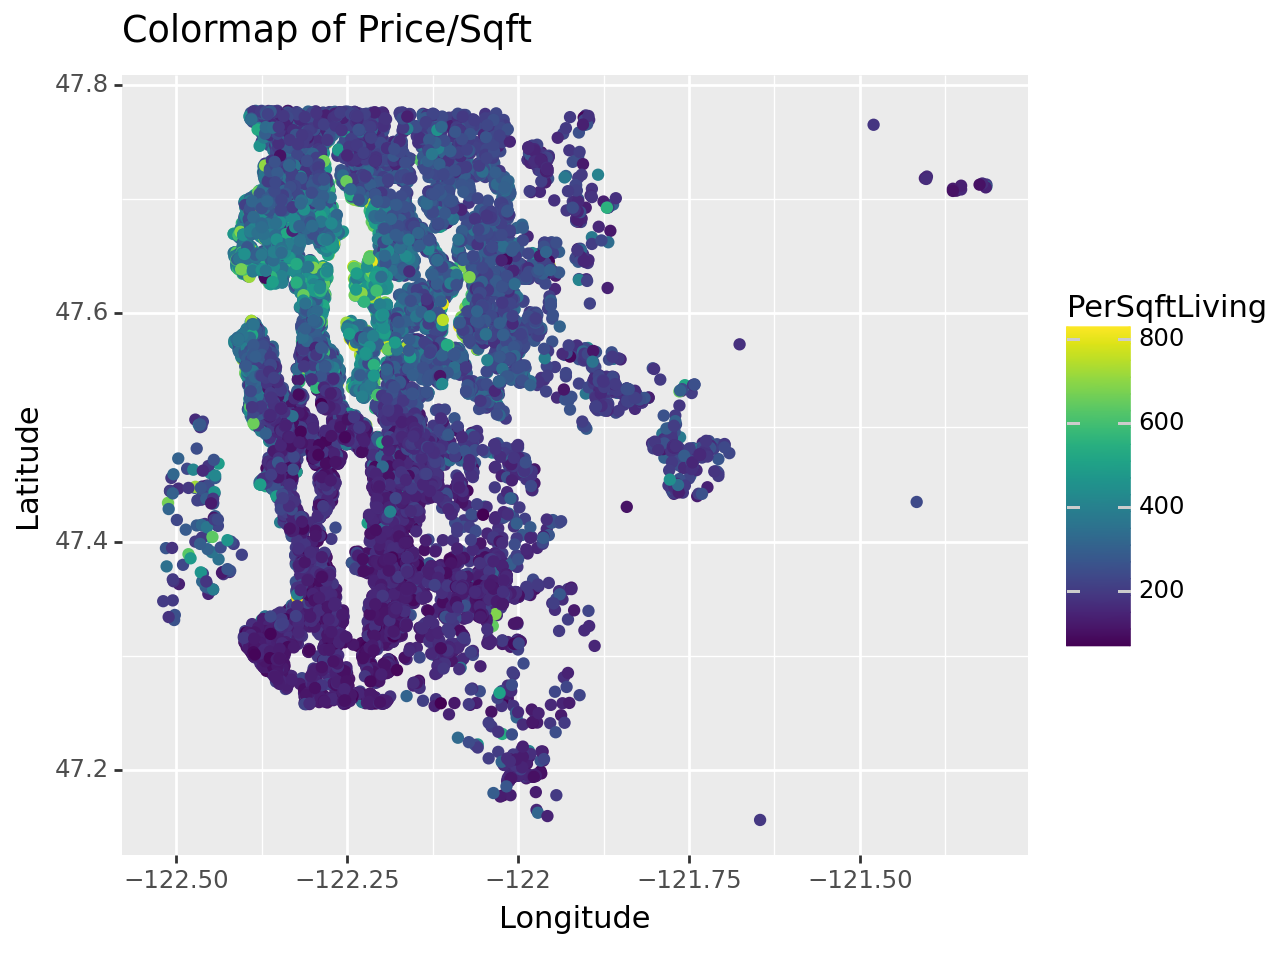

<Figure Size: (640 x 480)>

In [71]:
# Colormap of Price/Sqft
(ggplot(df)
 + aes(x='long', y='lat', color='PerSqftLiving')
 + geom_point()
 + labs(title='Colormap of Price/Sqft', x='Longitude', y='Latitude')
)



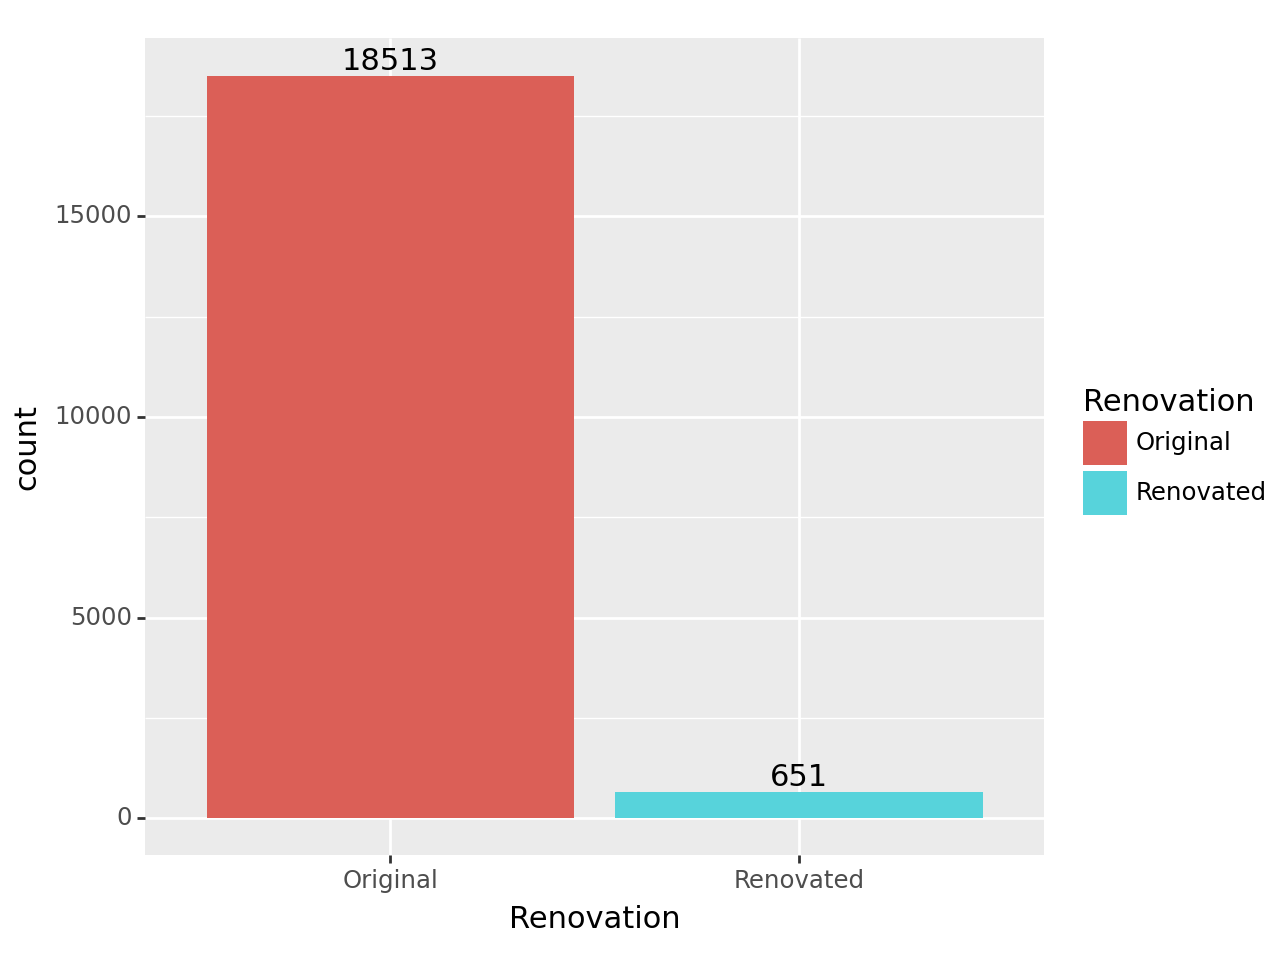

<Figure Size: (640 x 480)>

In [72]:
#Bar chart for renovation

(ggplot(df, aes('Renovation', fill='Renovation'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)


c:\Users\alpha\Anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


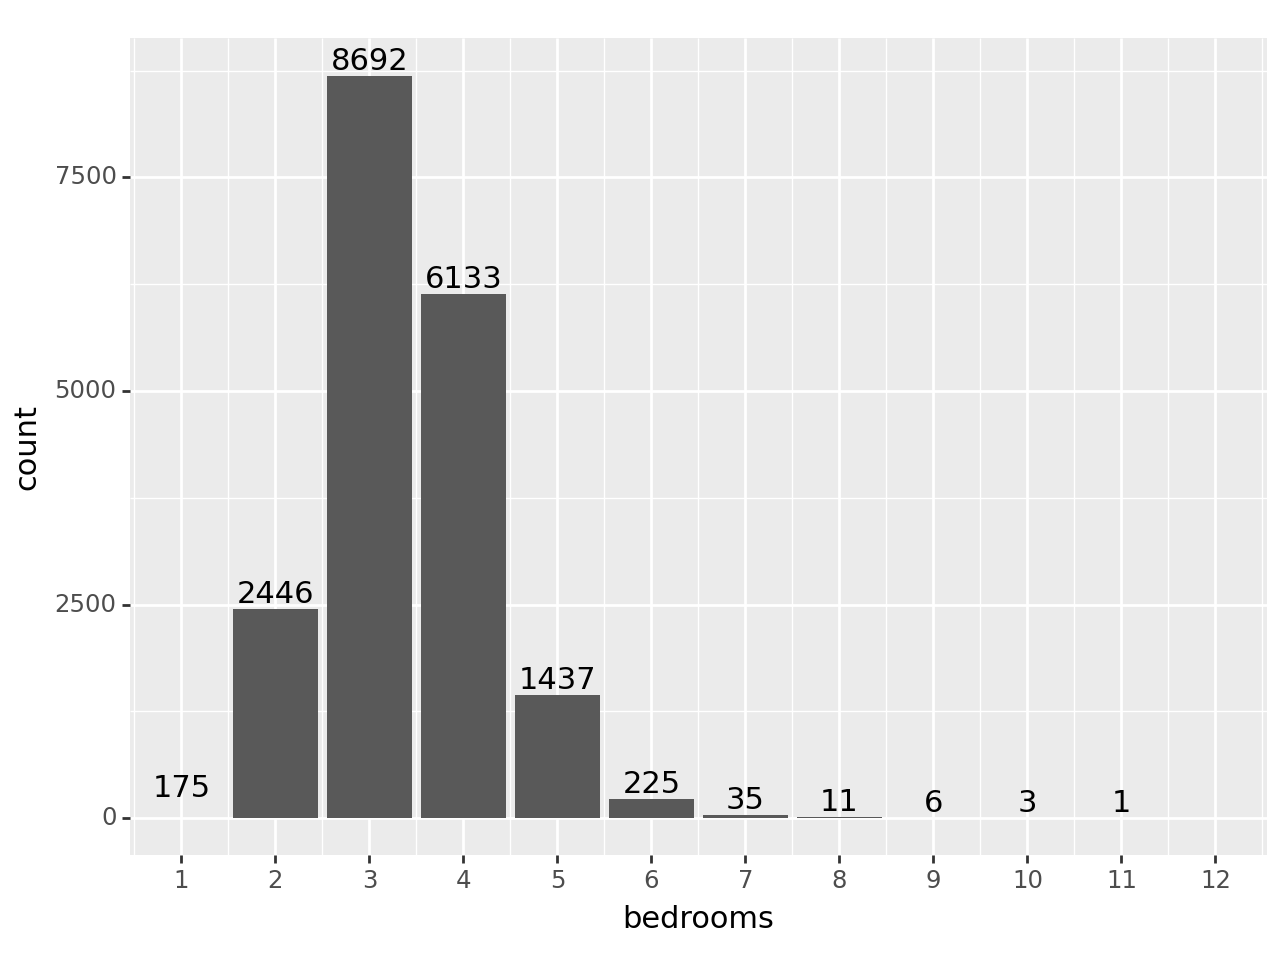

<Figure Size: (640 x 480)>

In [73]:
# Bar chart of bedrooms

def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()

def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

(ggplot(df, aes('bedrooms', fill='bedrooms'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
 +
    scale_x_continuous(
        limits = (1, 12),
        labels = labels(1, 12, 1),
        breaks = breaks(1, 12, 1)
    )
)

<Axes: xlabel='long', ylabel='lat'>

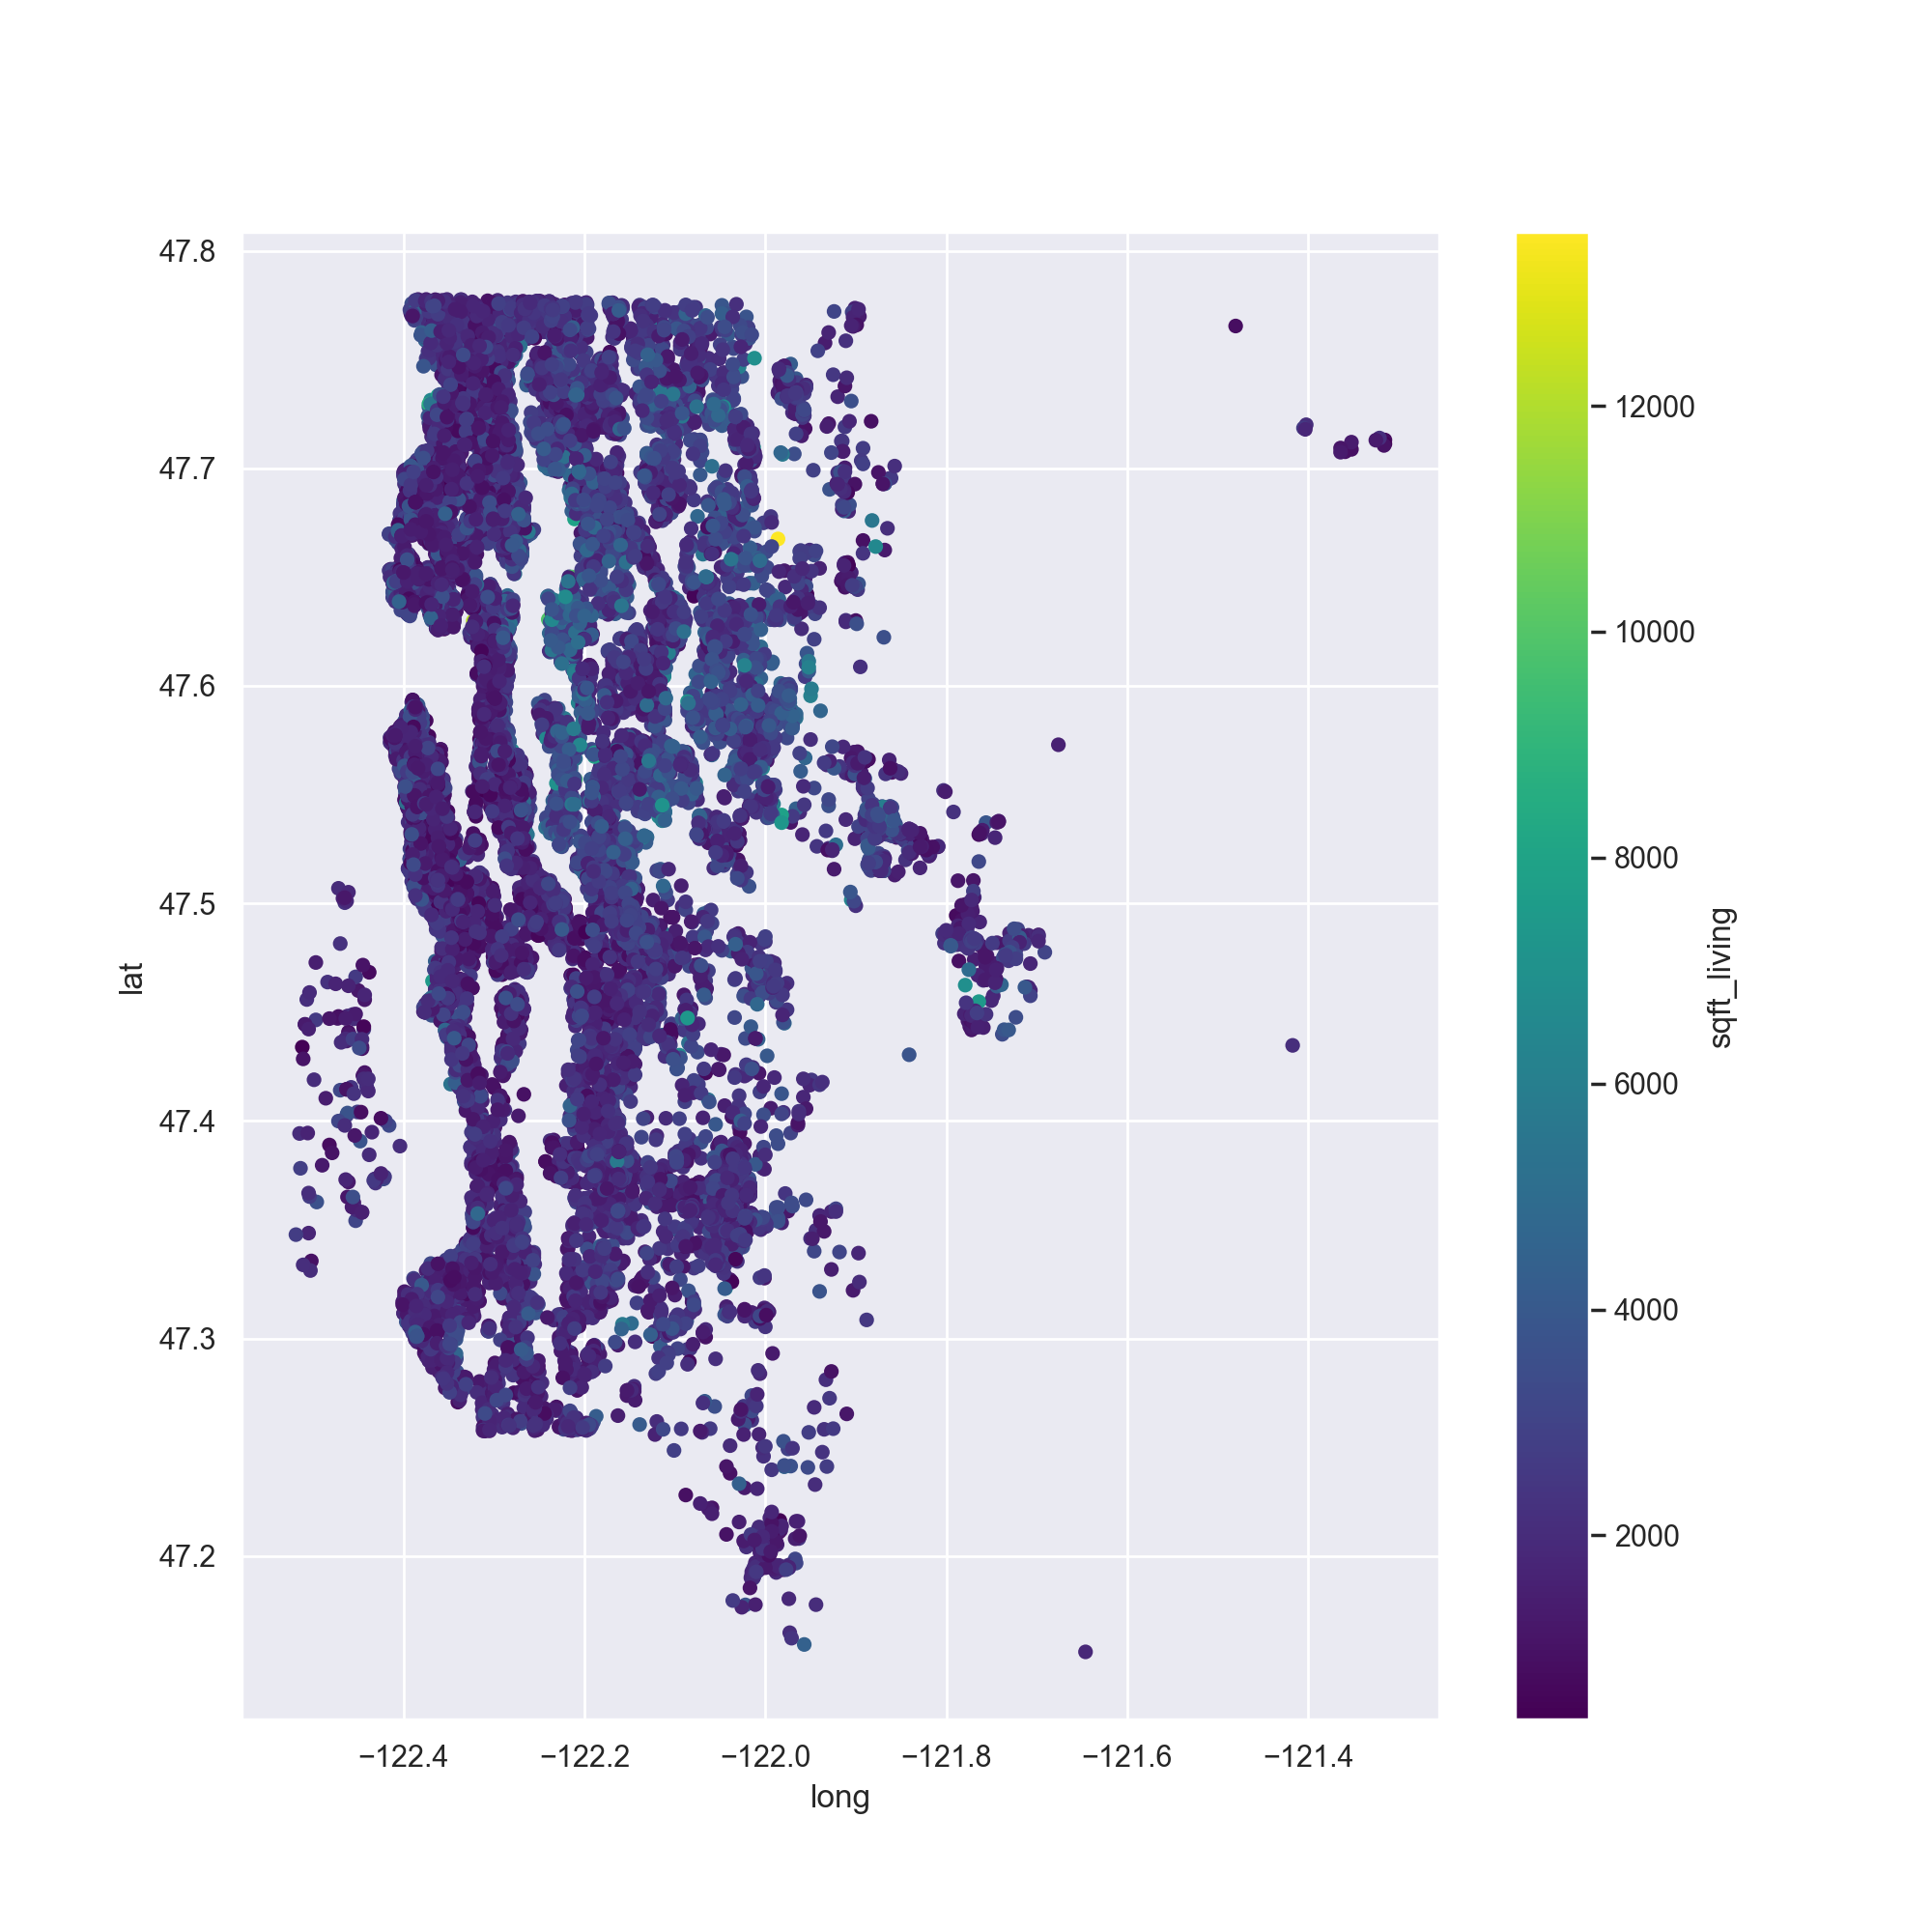

In [74]:
#lat, long with sqft_living
df.plot.scatter('long','lat',c='sqft_living',colormap='viridis', figsize=(10,10))



In [75]:
#lat,long with grade
#df.plot.scatter('long','lat',c='grade', colormap='viridis', figsize=(10,10))
#Or, where are the houses built with higher quality materials?



In [76]:
# Create a mapping dictionary for the transformed 'grade' categories to numeric values
grade_mapping = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Better': 4,
    'Very Good': 5,
    'Excellent': 6
}

# Create a function to map the original 'grade' values to the new categories
def transform_grade(grade):
    if grade in ['3 Poor', '4 Low']:
        return 'Poor'
    elif grade in ['5 Fair', '6 Low Average', '7 Average']:
        return 'Average'
    elif grade in ['8 Good', '9 Better']:
        return 'Good'
    elif grade == '10 Very Good':
        return 'Better'
    elif grade == '11 Excellent':
        return 'Very Good'
    elif grade in ['12 Luxury', '13 Mansion']:
        return 'Excellent'
    else:
        return None  # Handle other cases if needed

# Assuming you have already imported your DataFrame 'df'

# Create a new column 'transformed_grade' with the transformed categories
df['transformed_grade'] = df['grade'].apply(transform_grade)

# Map the transformed categories to numeric values using the 'grade_mapping' dictionary
df['grade_numeric'] = df['transformed_grade'].map(grade_mapping)

# Print the unique values in the 'transformed_grade' column
print(df['transformed_grade'].unique())

# Print the unique values in the 'grade_numeric' column
print(df['grade_numeric'].unique())

['Average' 'Good' 'Very Good' 'Better' 'Excellent' 'Poor']
[2 3 5 4 6 1]


Text(0, 0.5, 'Latitude')

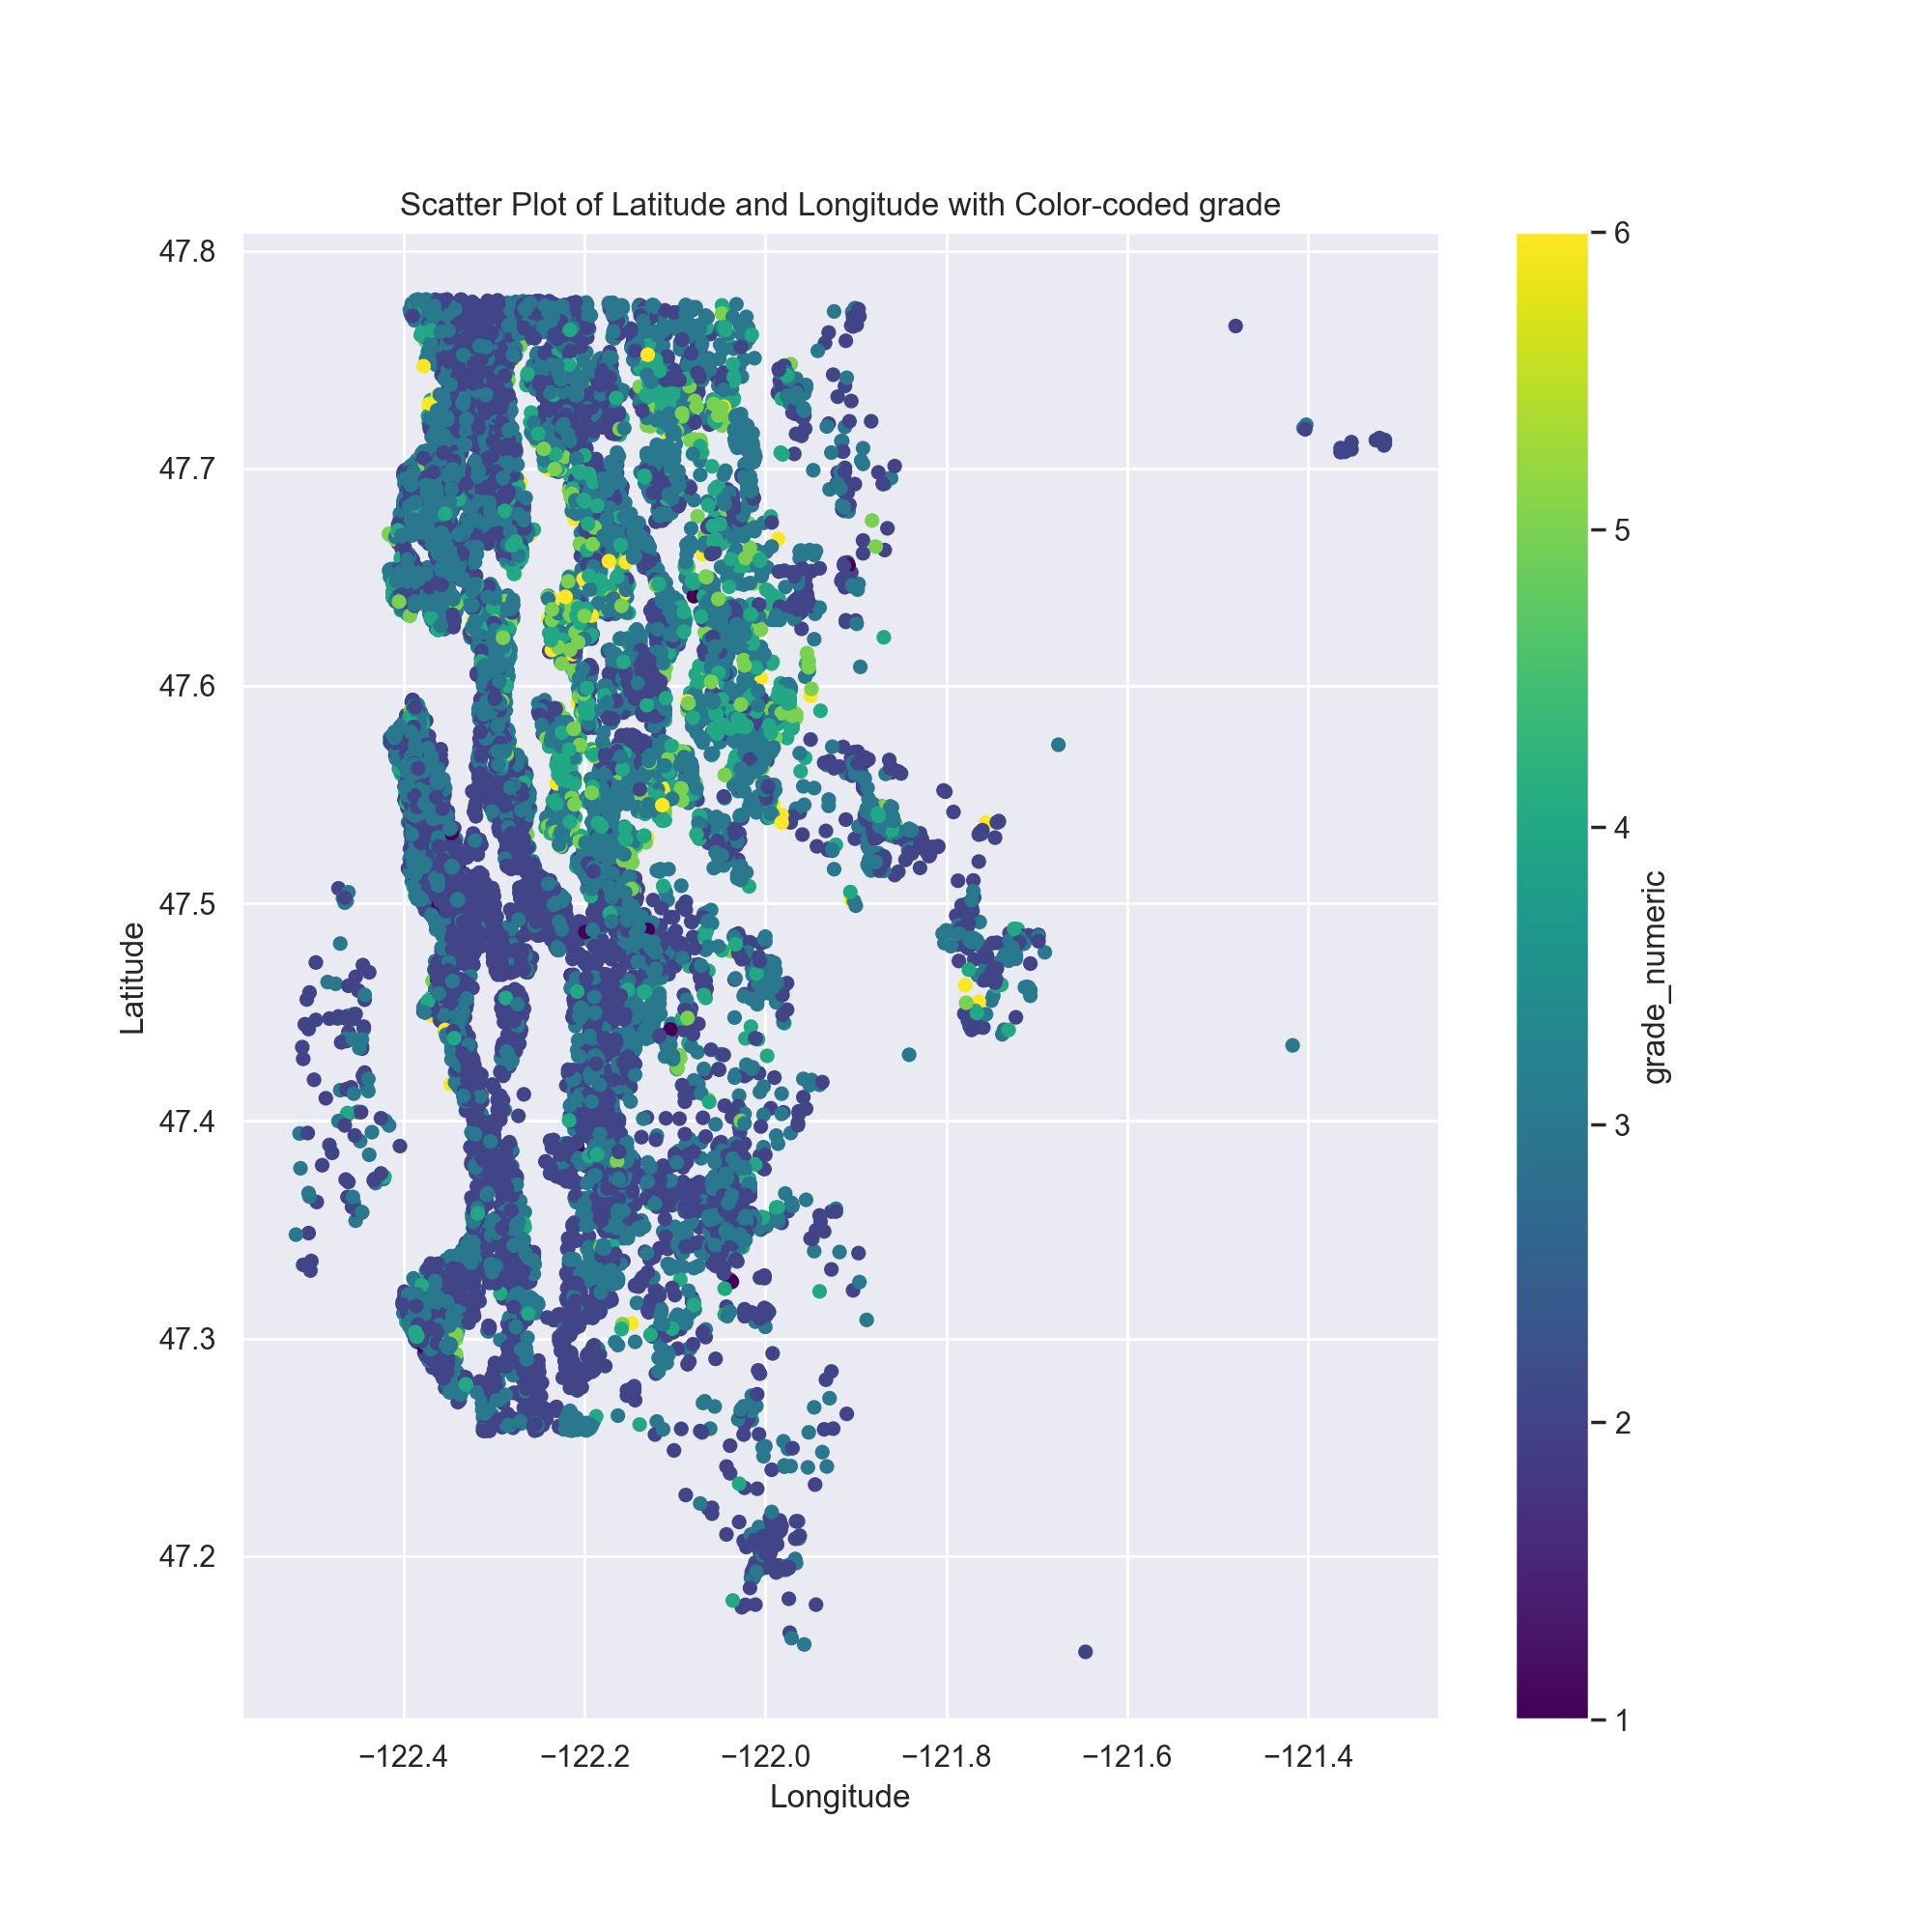

In [77]:
#lat,long with grade
df.plot.scatter('long','lat',c='grade_numeric', colormap='viridis', figsize=(10,10))
plt.title("Scatter Plot of Latitude and Longitude with Color-coded grade")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#Or, where are the houses built with higher quality materials?

Text(0, 0.5, 'Latitude')

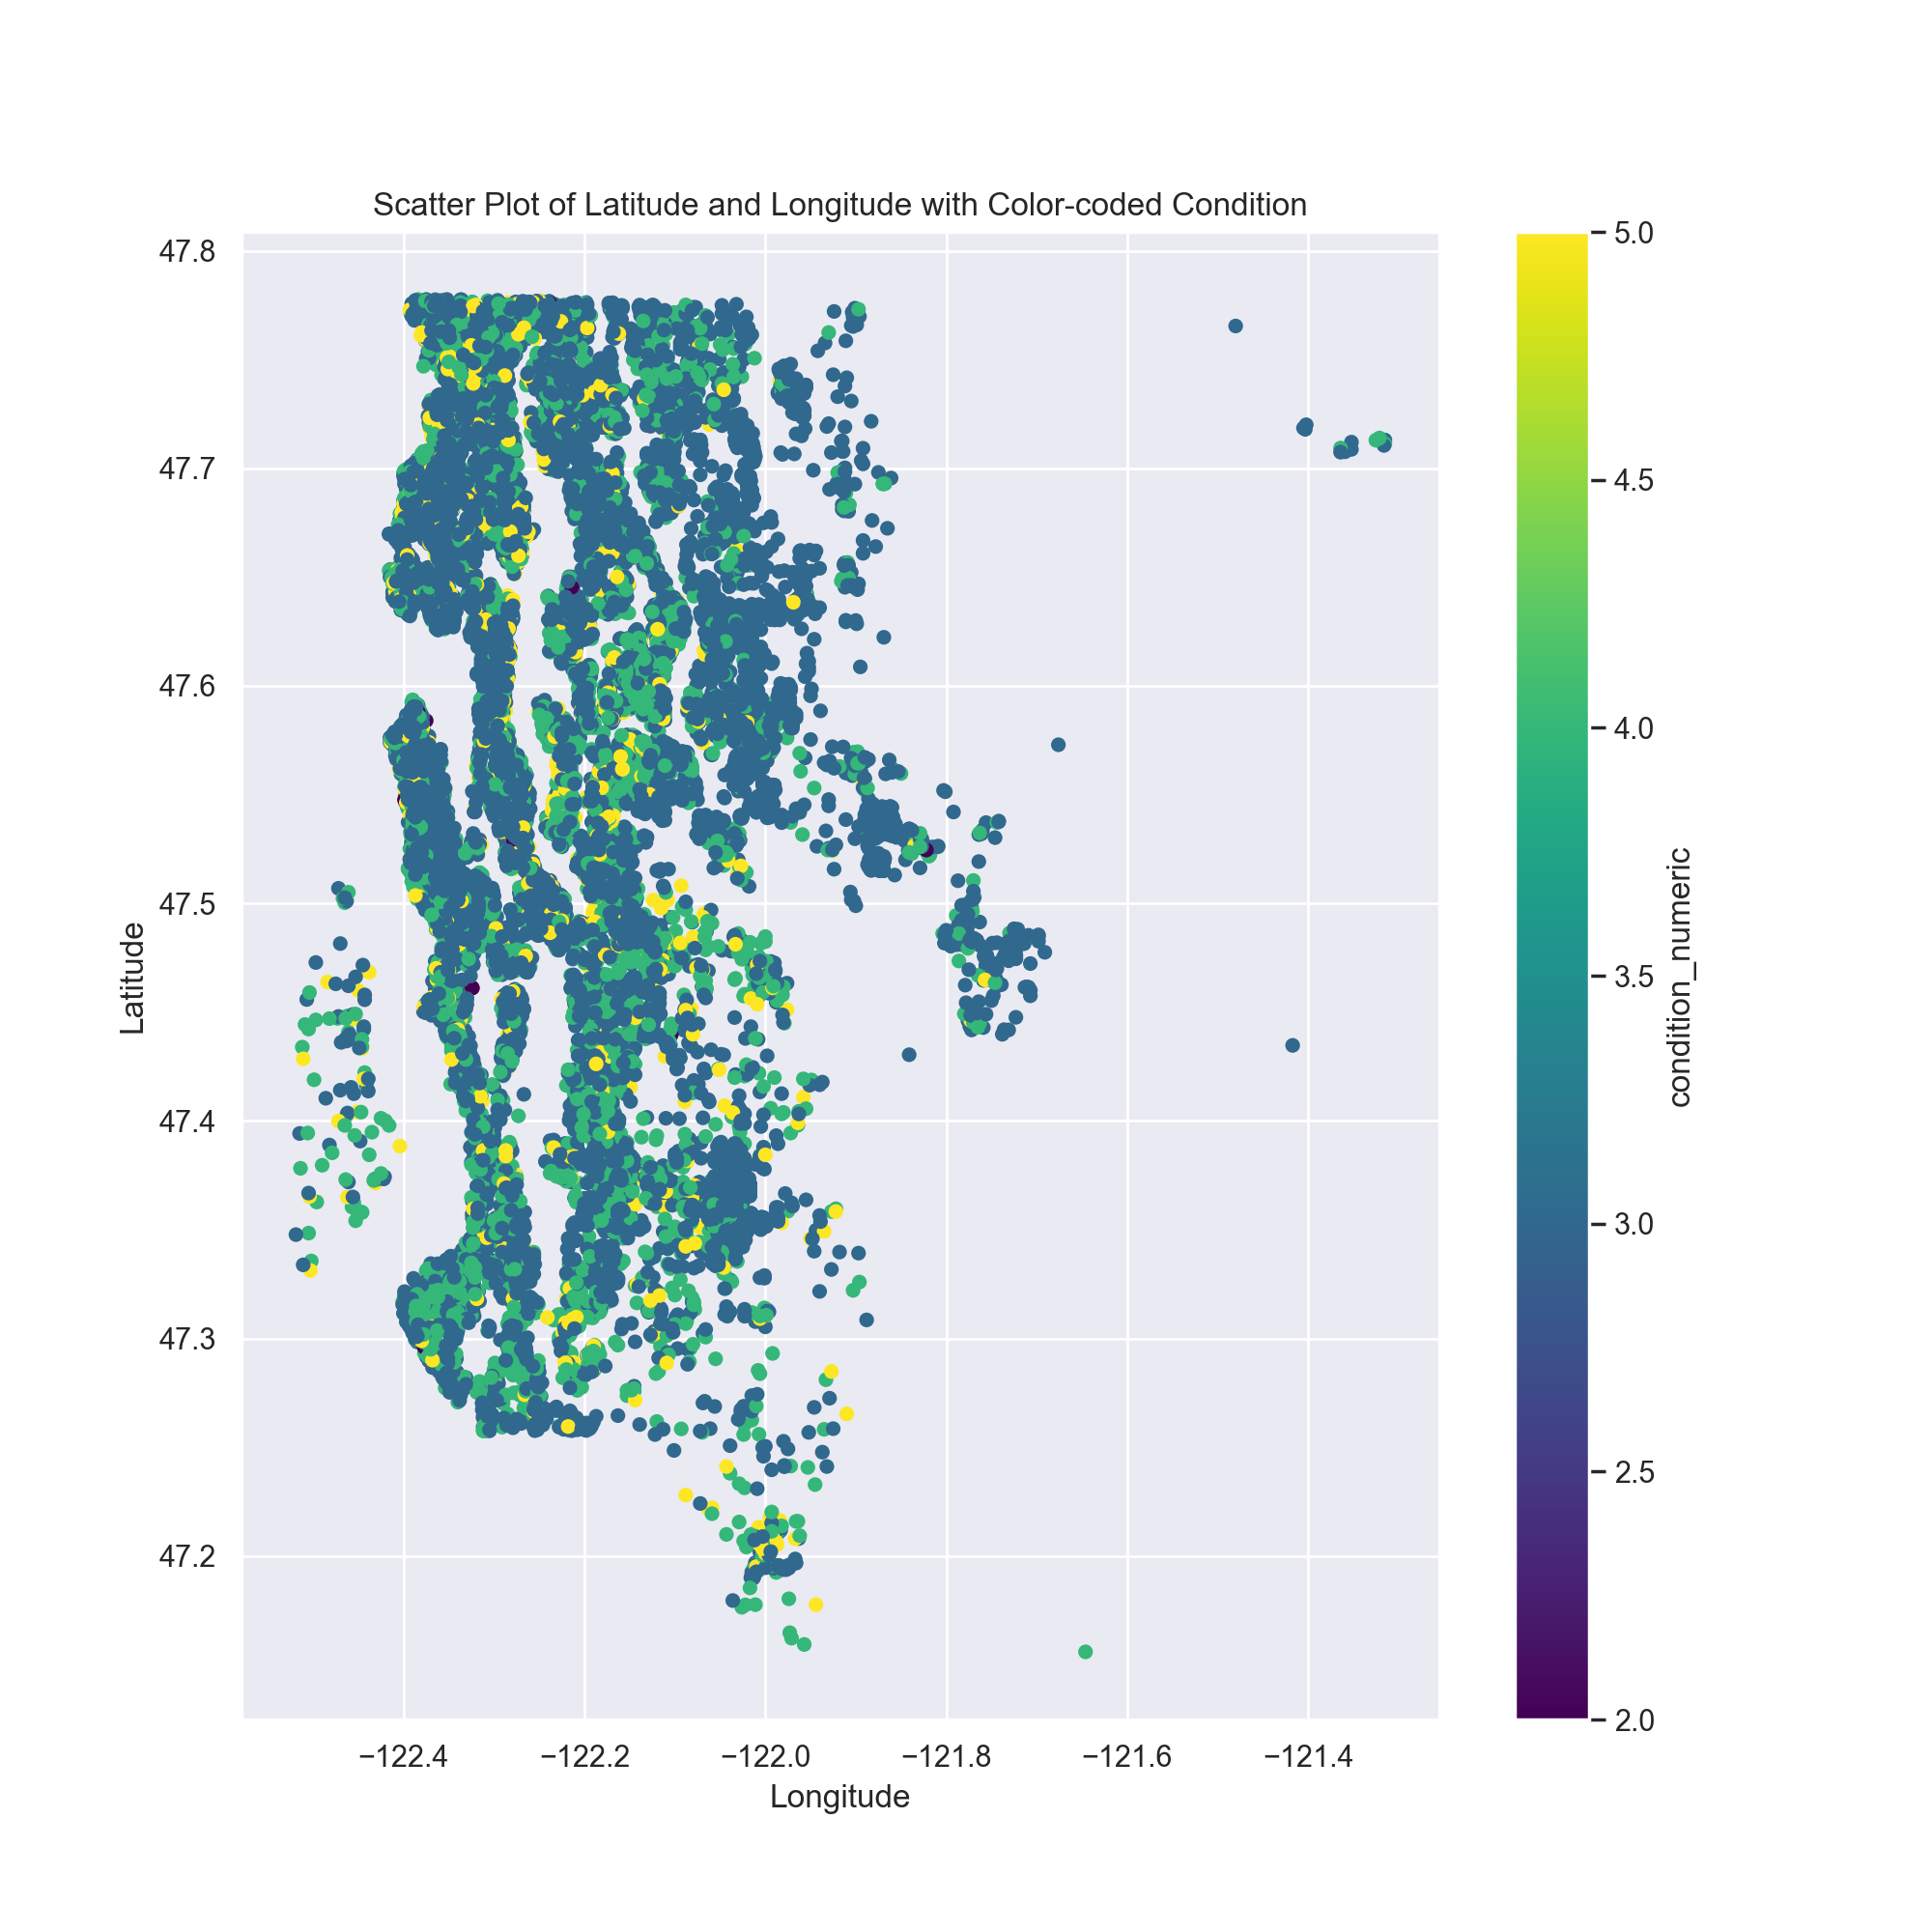

In [78]:
#lat, long with condition
# Create a mapping dictionary for 'condition' values to numeric values
condition_mapping = {
    'Very Poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Map the 'condition' column to numeric values using the dictionary
df['condition_numeric'] = df['condition'].map(condition_mapping)
df.plot.scatter('long','lat',c='condition_numeric', colormap='viridis', figsize=(10,10))
# Assuming you have already imported your DataFrame 'df'
#plt.figure(figsize=(10, 10))
#scatter_plot = df.plot.scatter(x='long', y='lat', c='condition_numeric', colormap='viridis', figsize=(10, 10))
plt.title("Scatter Plot of Latitude and Longitude with Color-coded Condition")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.colorbar(label='Condition')  # Add a colorbar with condition labels
#plt.show()


Correlation with Price:
price                 1.000000
sqft_living           0.704428
grade_numeric         0.654537
sqft_above            0.609611
sqft_living15         0.582450
PerSqftLiving         0.554103
bathrooms             0.526609
view_numeric          0.395766
bedrooms              0.317145
lat                   0.306372
water_front           0.270982
floors                0.258797
yr_renovated          0.111211
Renovation_numeric    0.110940
sqft_lot              0.087430
sqft_lot15            0.081562
yr_built              0.053433
condition_numeric     0.027496
long                  0.021714
year_sold             0.004988
id                   -0.018107
zipcode              -0.050191
age                  -0.053351
Name: price, dtype: float64


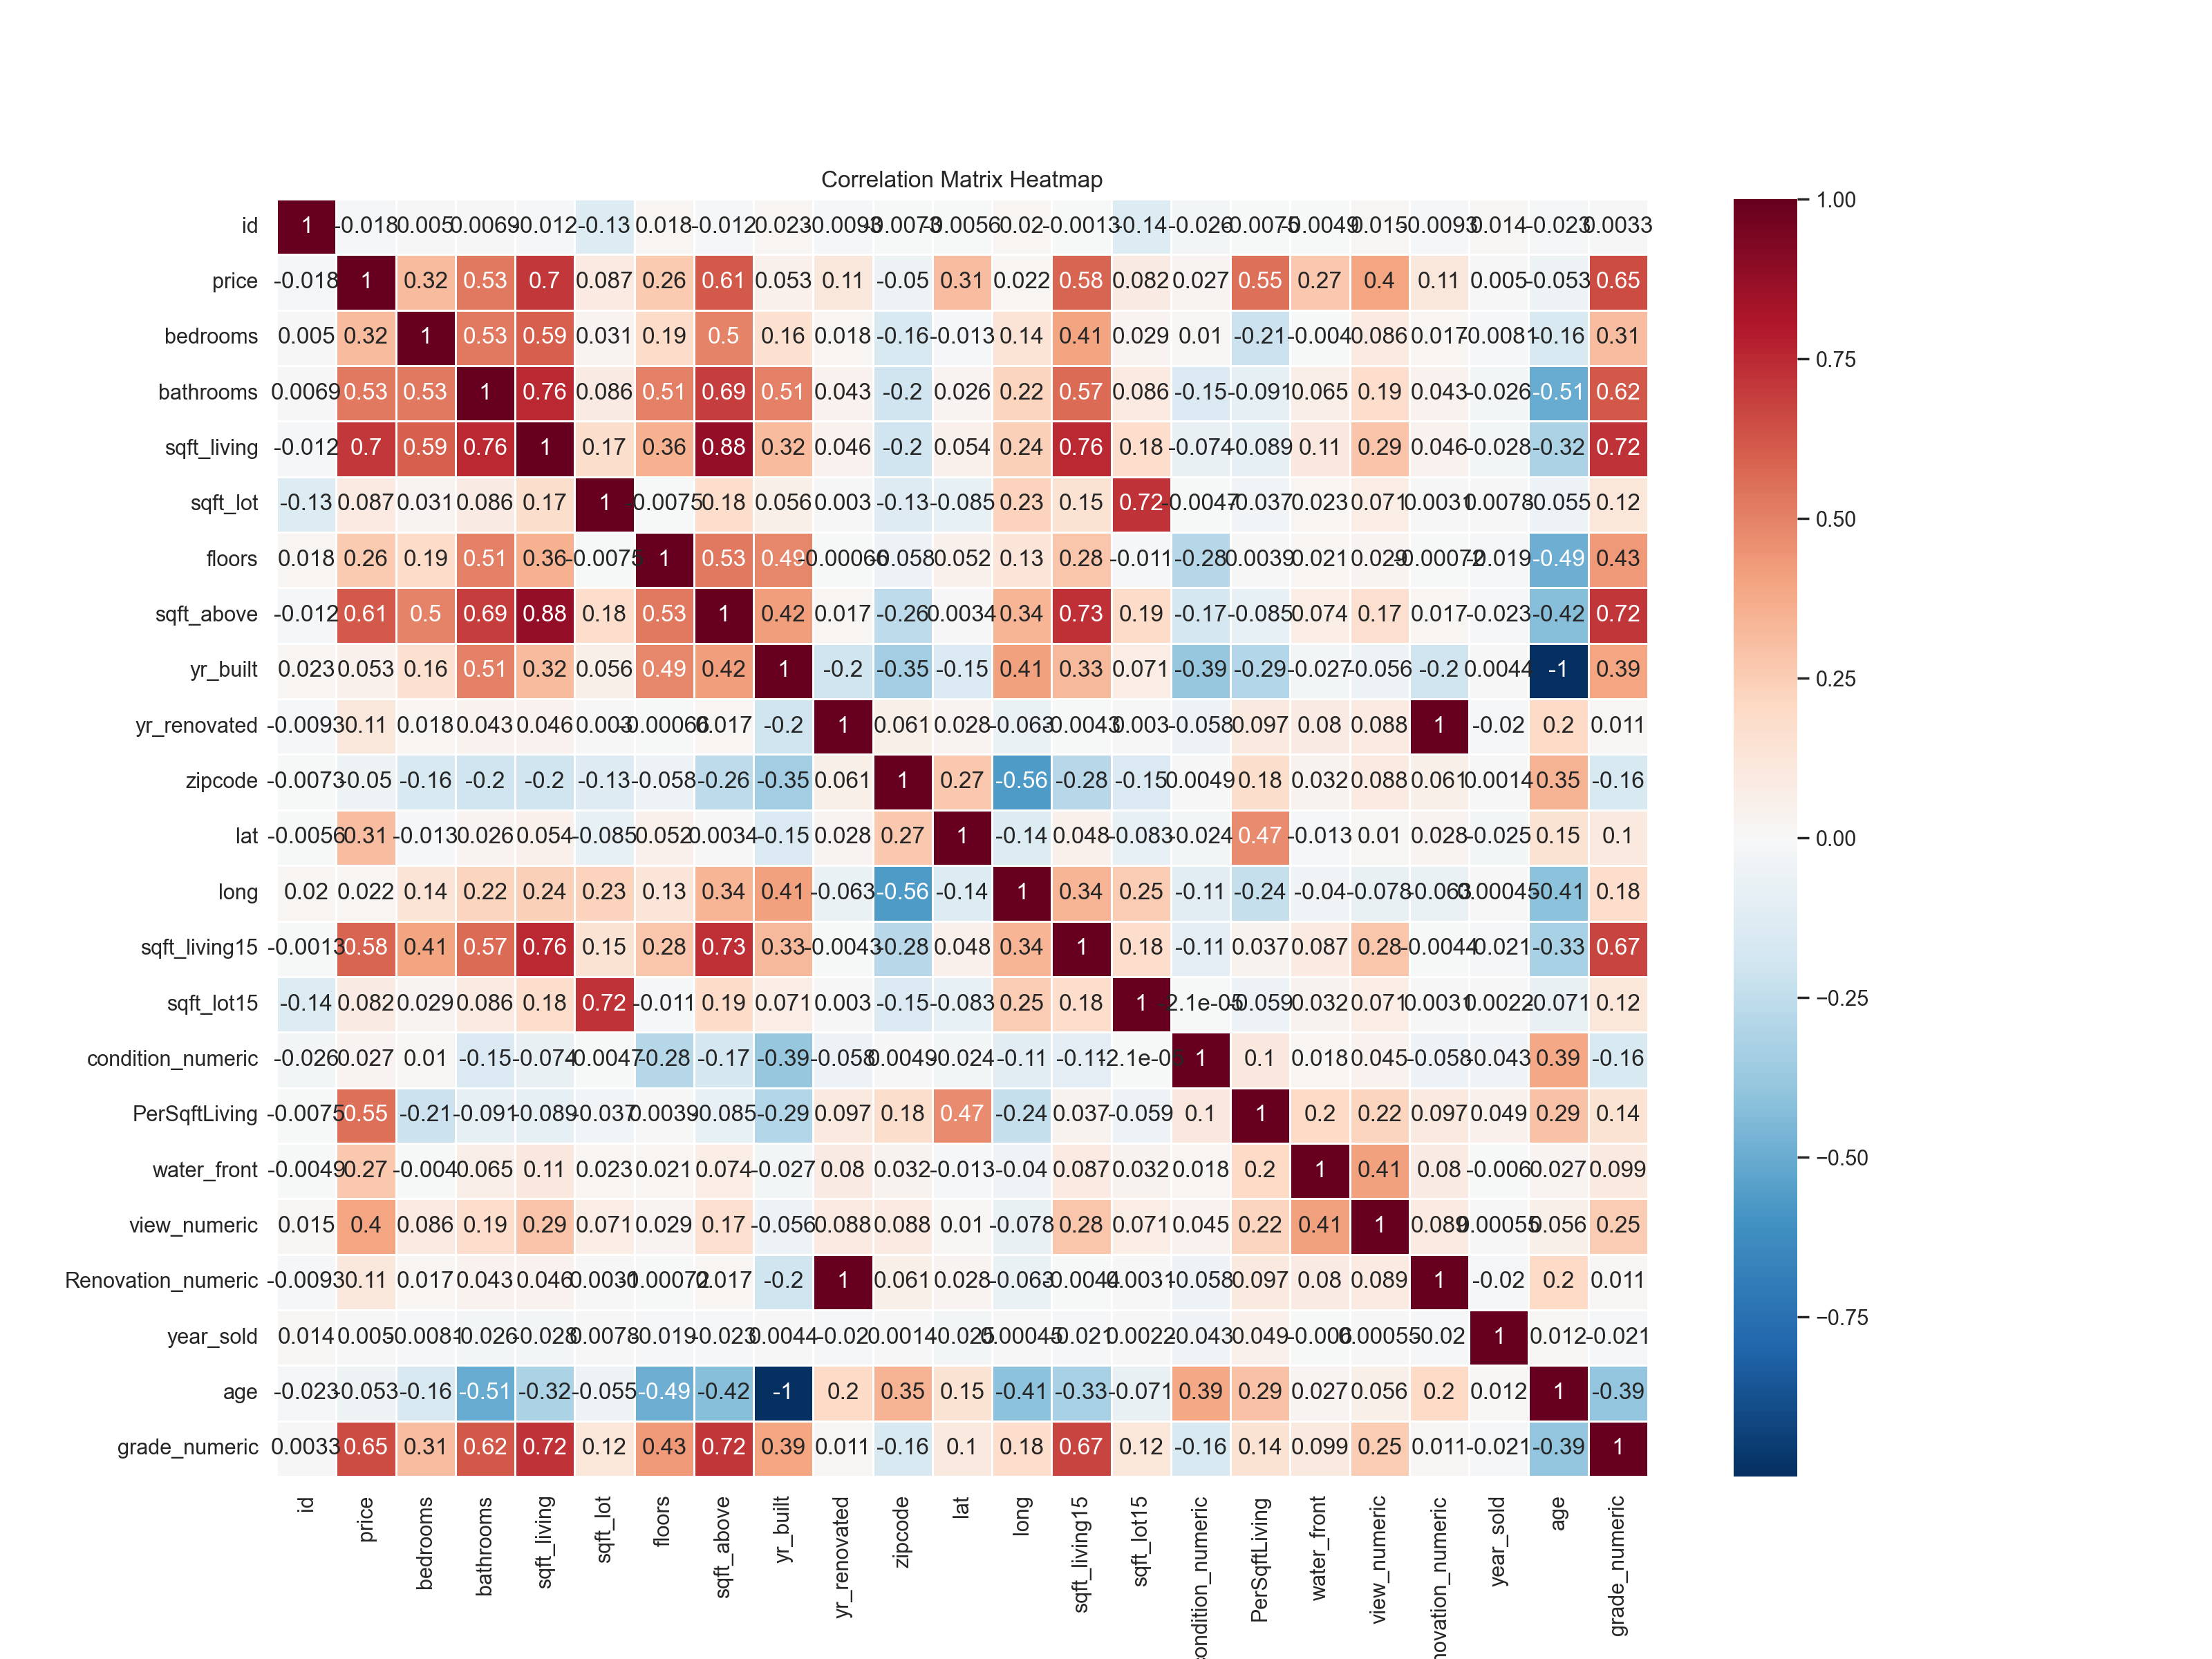

In [79]:
# Identify non-numeric columns and exclude them from correlation calculations
numeric_columns = df.select_dtypes(include=[np.number])
correlation_with_price = numeric_columns.corr()['price'].sort_values(ascending=False)
print("Correlation with Price:")
print(correlation_with_price)

# Calculate correlation matrix for all numeric columns
correlation = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation, annot=True, cbar=True, cmap="RdBu_r", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

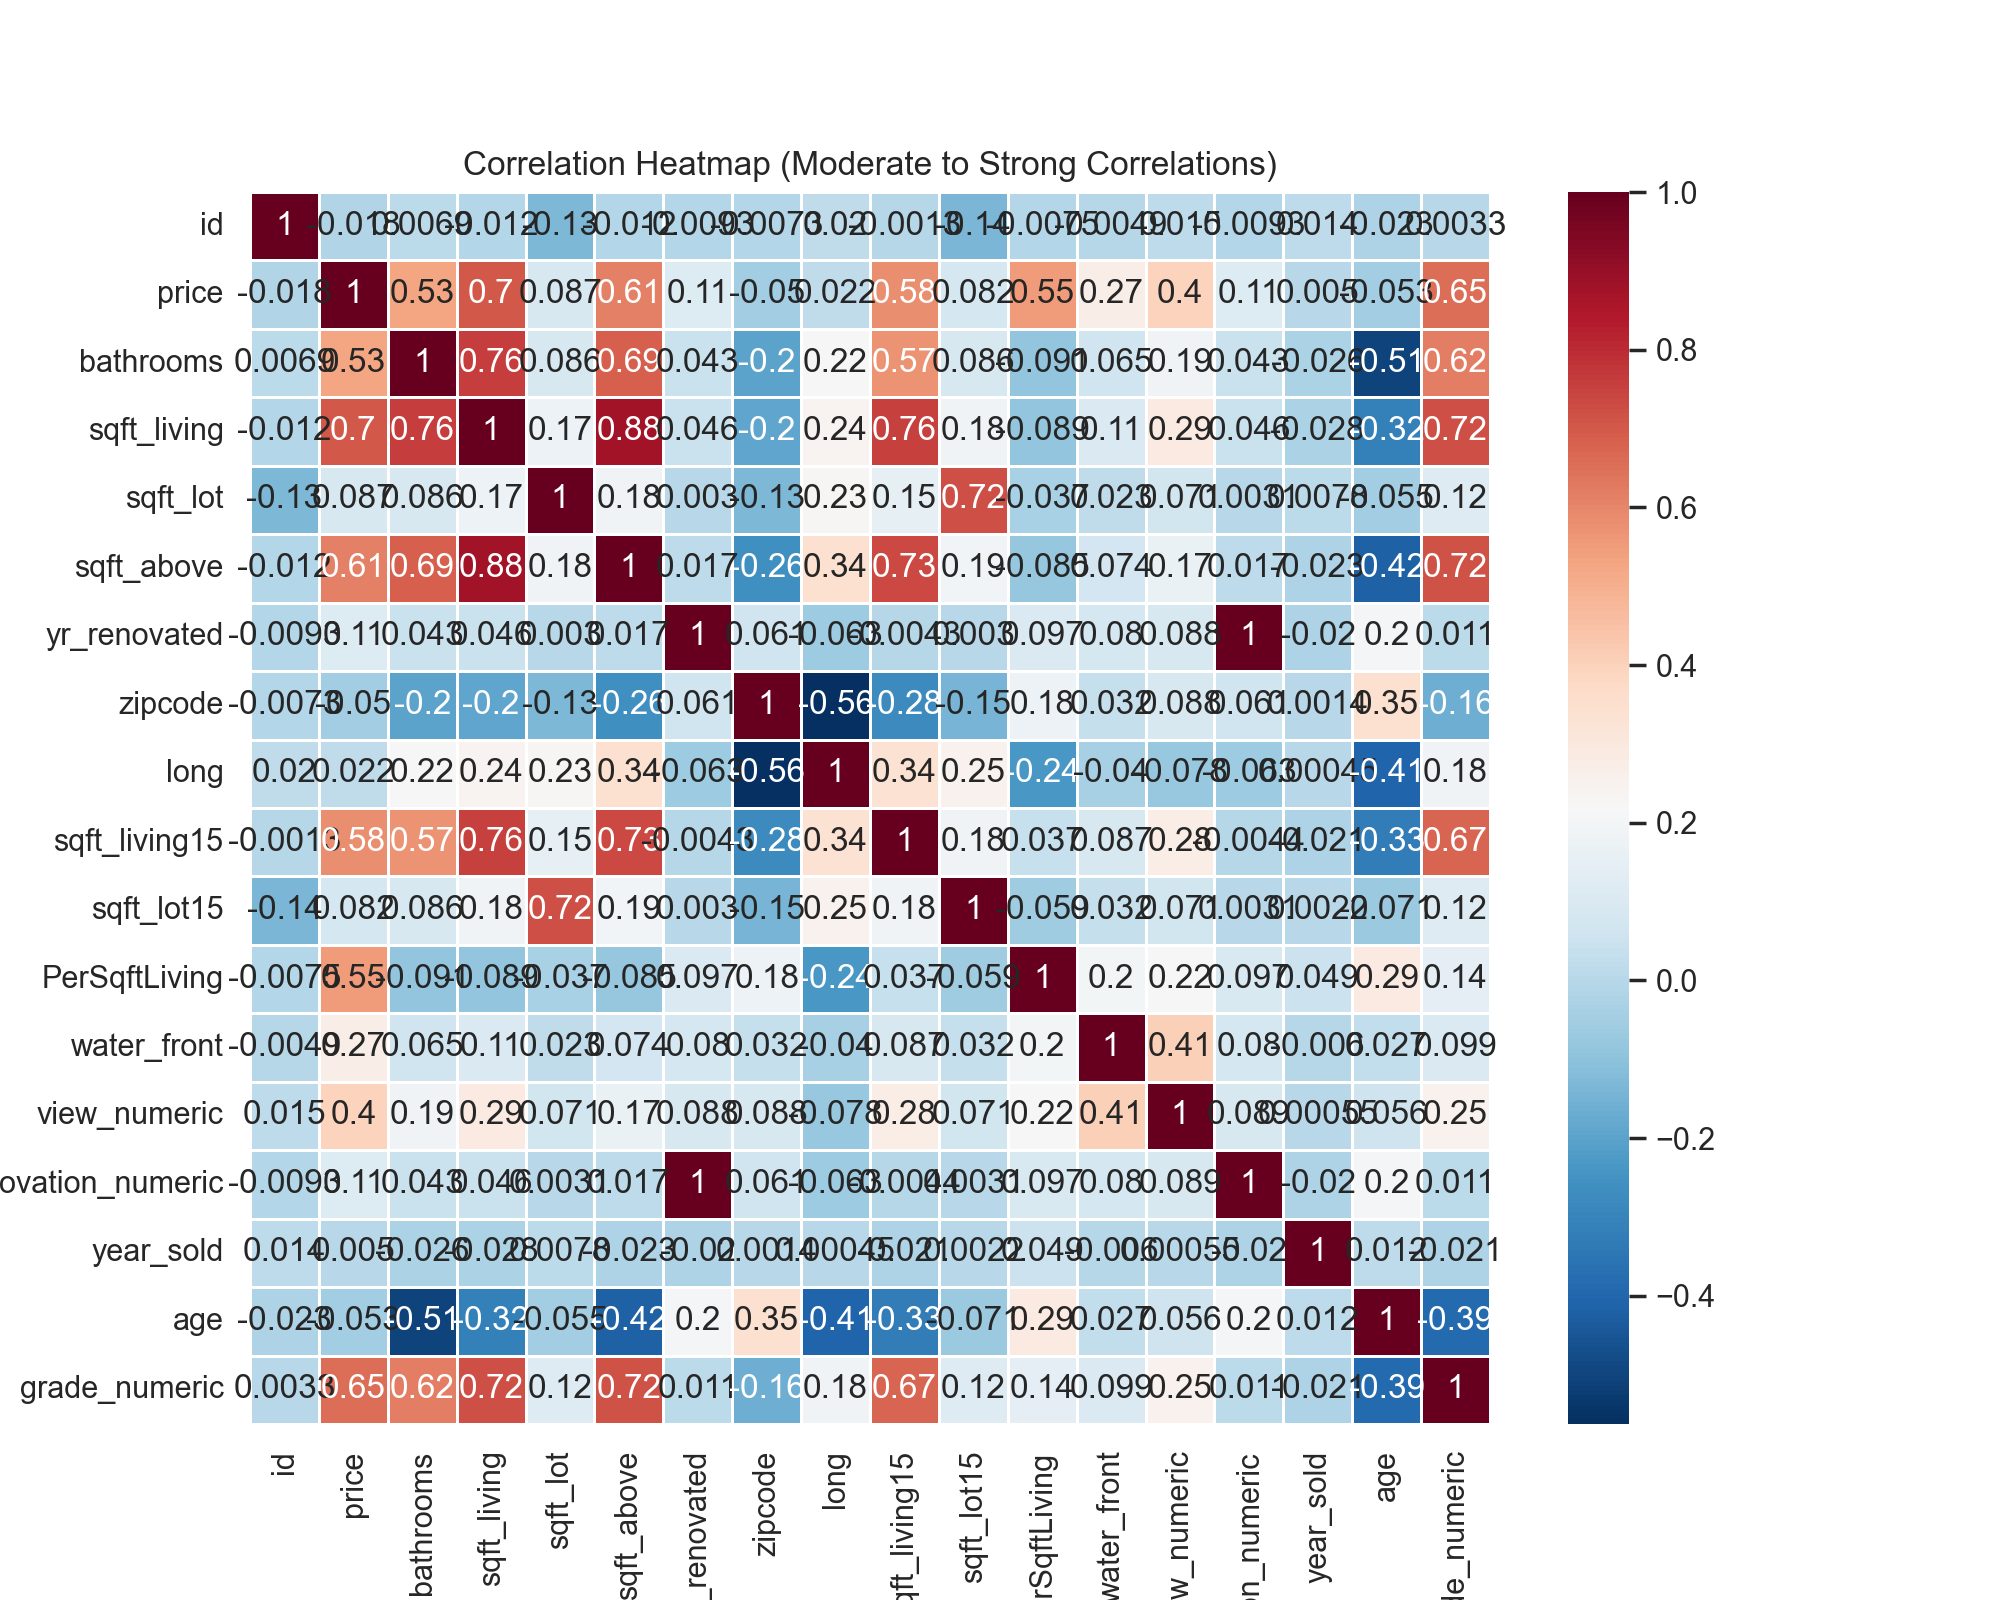

In [80]:

# With the correlation matrix 'correlation'

# Defining a list of columns to exclude from the heatmap
columns_to_exclude = [ 'lat', 'condition_numeric', 'yr_built', 'floors', 'bedrooms',]

# Creating a new DataFrame containing only the columns you want to include in the heatmap
heatmap_df = correlation.drop(columns=columns_to_exclude, index=columns_to_exclude)

# Creating the heatmap
plt.figure(figsize=(13, 13))
heatmap2 = sns.heatmap(heatmap_df, annot=True, cmap="RdBu_r", linewidths=0.5)
plt.title("Correlation Heatmap (Moderate to Strong Correlations)")
plt.show()

In [84]:
#only keeping columns we want
for colName in copyDF:
    print(colName)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
condition_numeric
PerSqftLiving
water_front
view_numeric
Sector
Renovation
Renovation_numeric
year_sold
age
transformed_grade
grade_numeric


In [85]:
# Calculate the mean of the 'condition_numeric' column
mean_condition = df['condition_numeric'].mean()

# Fill missing values with the mean
df['condition_numeric'].fillna(mean_condition, inplace=True)

# Verify that missing values have been filled
print("Missing values filled with mean:", df['condition_numeric'].isnull().sum())

Missing values filled with mean: 0


In [86]:
#Checking for remaining missing values
df.isnull().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
condition_numeric     0
PerSqftLiving         0
water_front           0
view_numeric          0
Sector                0
Renovation            0
Renovation_numeric    0
year_sold             0
age                   0
transformed_grade     0
grade_numeric         0
dtype: int64

In [87]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_numeric',
       'PerSqftLiving', 'water_front', 'view_numeric', 'Sector', 'Renovation',
       'Renovation_numeric', 'year_sold', 'age', 'transformed_grade',
       'grade_numeric'],
      dtype='object')

In [88]:
# Check and handle missing values
if df.isnull().sum().any():
    df = df.dropna()  
# For simplicity, you can drop rows with missing values

In [89]:
df.isnull().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
condition_numeric     0
PerSqftLiving         0
water_front           0
view_numeric          0
Sector                0
Renovation            0
Renovation_numeric    0
year_sold             0
age                   0
transformed_grade     0
grade_numeric         0
dtype: int64

In [90]:
#import statsmodels.api as sm
#import pandas as pd

# Assuming you have prepared your data with appropriate data types

# Check and handle missing values
#if df.isnull().sum().any():
#    df = df.dropna()  
# For simplicity, you can drop rows with missing values
    
# Data preprocessing: Encode categorical variables if needed
# Example: df = pd.get_dummies(df, columns=['categorical_column'])

# Define your dependent (y) and independent (X) variables
#y = df['price']
#X = df['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'water_front', 'view_numeric', 'condition_numeric', 'grade_numeric', 'yr_built', 'zipcode', 'yr_renovated', 'PerSqftLiving']

# Add a constant (intercept) to the independent variables
#X = sm.add_constant(X)

# Create a linear regression model
#model = sm.OLS(y, X)

# Fit the model to the data
#results = model.fit()

# Get a summary of the model
#summary = results.summary()

# Print the summary
#print(summary)


In [91]:
# Get the unique categories in the 'Sector' column
unique_categories = df['Sector'].unique()

# Print the unique categories
print(unique_categories)

['D(>=98122)' 'A (<= 98028)' 'C(>98072 & <98122)' 'B (>98028 & <=98072)']


In [92]:
# Define a mapping from 'Below 98028' to 1 and '98122 and Above' to 4
mapping = {'A (<= 98028)': 1, 'B (>98028 & <=98072)': 2, 'C(>98072 & <98122)': 3, 'D(>=98122)': 4}

# Apply the mapping to make the 'Sector' column numeric
df['sector_numeric'] = df['Sector'].str.upper().map(mapping)

In [93]:
# Get the unique categories in the 'sector_numeric' column
unique_categories = df['sector_numeric'].unique()

# Print the unique categories
print(unique_categories)

[4 1 3 2]


In [94]:
df['sector_numeric'].value_counts

<bound method IndexOpsMixin.value_counts of 1        4
2        1
3        4
4        3
5        2
        ..
21591    3
21592    3
21593    4
21594    4
21596    4
Name: sector_numeric, Length: 19164, dtype: int64>

In [95]:
# Get the unique categories in the 'Renovated' column
unique_categories = df['Renovation'].unique()

# Print the unique categories
print(unique_categories)

['Renovated' 'Original']


In [96]:
# Define a mapping from 'Poor' to 0 and 'Very Good' to 4
mapping = {'Renovated': 1, 'Original': 0,}

# Apply the mapping to make the 'Sector' column numeric
df['sector_numeric'] = df['Sector'].str.upper().map(mapping)

In [97]:
# Get the unique categories in the 'view' column
unique_categories = df['bedrooms'].unique()

# Print the unique categories
print(unique_categories)

[ 3  2  4  5  1  6  7  8  9 11 10]


In [98]:
# Get the unique categories in the 'view' column
unique_categories = df['bathrooms'].unique()

# Print the unique categories
print(unique_categories)

[2.25 1.   3.   2.   4.5  2.5  1.75 2.75 1.5  3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 0.5  5.5  6.75 6.   5.75 8.   7.5  7.75 6.25
 6.5 ]


In [99]:
df.shape

(19164, 33)

In [100]:
# Get the unique categories in the 'view' column
unique_categories = df['sqft_living'].unique()

# Print the unique categories
print(unique_categories)

[ 2570   770  1960  1680  5420  1715  1780  1890  1160  1430  1370  1810
  2950  1600  1200  1250  1620  3050  2270  2450  1710  1400  1520  2320
  1190  2330  1090  2060  2300  1660  2360  1220  2620  4220  3595  1570
  1280  3160   990  2290  2753  3150  1410  1980  2730  2250  2420  3250
  1850  1260  1540  2770  2240  1000  3200  4770  2750  2380  1790  3430
  1760  1040  3450  2350  1900  2020   960  2140  2660  1610  1030  3520
  1580  3300  2070  2190  2920  1210  1670  1240  3140  2030  2310  2080
  4380  1590   880  2400  1450  2910  2160  1060  2010  3950  1320  2590
  1170  1110  2820  3670  2550  2260  1360  5180   700  1180  3960  2640
  1270  3400  1910  1340  2680  1560  3880  1120  1970  1950  1050  3130
  4090  1490  2230  1650  2180  1690  1350  1940  1010  1300   910  2440
   900  2714  1720   850  3900  2760  1750  2220  1480  2280  2940  2480
  3760  3830  4410   830  2740  3650   720  3360  1510  1730  1420  1230
  2100   760  1700  1070  5050  5310  1080  2653  3

In [101]:
# Get the unique categories in the 'view' column
unique_categories = df['sqft_lot'].unique()

# Print the unique categories
print(unique_categories)

[ 7242 10000  5000 ...  1126  5813  1076]


In [102]:
df

id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
2      5631500400 2015-02-25   180000.0         2       1.00          770   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
4      1954400510 2015-02-18   510000.0         3       2.00         1680   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
...           ...        ...        ...       ...        ...          ...   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   
21592   263000018 2014-05-21   360000.0         3       2.50         1530   
21593  6600060120 2015-02-23   400000.0         4       2.50         2310   
21594  1523300141 2014-06-23   402101.0         2       0.75         1020   
21596  1523300157 2014-10-15   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... water_front view_numeric  \
1          7242     2.0         NO  NONE  ...         0.0          0.0   
2         10000     1.0         NO  NONE  ...         0.0          0.0   
3          5000     1.0         NO  NONE  ...         0.0          0.0   
4          8080     1.0         NO  NONE  ...         0.0          0.0   
5        101930     1.0         NO  NONE  ...         0.0          0.0   
...         ...     ...        ...   ...  ...         ...          ...   
21591      1294     2.0         NO  NONE  ...         0.0          0.0   
21592      1131     3.0         NO  NONE  ...         0.0          0.0   
21593      5813     2.0         NO  NONE  ...         0.0          0.0   
21594      1350     2.0         NO  NONE  ...         0.0          0.0   
21596      1076     2.0         NO  NONE  ...         0.0          0.0   

                     Sector Renovation  Renovation_numeric  year_sold  age  \
1                D(>=98122)  Renovated                   1       2014   63   
2              A (<= 98028)   Original                   0       2015   82   
3                D(>=98122)   Original                   0       2014   49   
4        C(>98072 & <98122)   Original                   0       2015   28   
5      B (>98028 & <=98072)   Original                   0       2014   13   
...                     ...        ...                 ...        ...  ...   
21591    C(>98072 & <98122)   Original                   0       2015    7   
21592    C(>98072 & <98122)   Original                   0       2014    5   
21593            D(>=98122)   Original                   0       2015    1   
21594            D(>=98122)   Original                   0       2014    5   
21596            D(>=98122)   Original                   0       2014    6   

       transformed_grade  grade_numeric  sector_numeric  
1                Average              2             NaN  
2                Average              2             NaN  
3                Average              2             NaN  
4                   Good              3             NaN  
5              Very Good              5             NaN  
...                  ...            ...             ...  
21591               Good              3             NaN  
21592               Good              3             NaN  
21593               Good              3             NaN  
21594            Average              2             NaN  
21596            Average              2             NaN  

[19164 rows x 33 columns]

In [103]:
#
# Linear Regression Model
copyDF
#deleting columns that we don't want included in the model & saving the result to new dataframe
regdf = copyDF.drop(['id', 'sector_numeric', 'grade', 'sqft_basement', 'yr_built', 'Renovation','waterfront','Sector','condition', 'date','view','transformed_grade'],axis = 1)
regdf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition_numeric', 'PerSqftLiving', 'water_front',
       'view_numeric', 'Renovation_numeric', 'year_sold', 'age',
       'grade_numeric'],
      dtype='object')

In [104]:
#looking at the new shape of the regression data frame
regdf.shape
regdf.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
1   538000.0         3       2.25         2570      7242     2.0        2170   
2   180000.0         2       1.00          770     10000     1.0         770   
3   604000.0         4       3.00         1960      5000     1.0        1050   
4   510000.0         3       2.00         1680      8080     1.0        1680   
5  1230000.0         4       4.50         5420    101930     1.0        3890   

   yr_renovated  zipcode      lat  ...  sqft_living15  sqft_lot15  \
1        1991.0    98125  47.7210  ...           1690        7639   
2           0.0    98028  47.7379  ...           2720        8062   
3           0.0    98136  47.5208  ...           1360        5000   
4           0.0    98074  47.6168  ...           1800        7503   
5           0.0    98053  47.6561  ...           4760      101930   

   condition_numeric  PerSqftLiving  water_front  view_numeric  \
1                3.0         209.34          0.0           0.0   
2                3.0         233.77          0.0           0.0   
3                5.0         308.16          0.0           0.0   
4                3.0         303.57          0.0           0.0   
5                3.0         226.94          0.0           0.0   

   Renovation_numeric  year_sold  age  grade_numeric  
1                   1       2014   63              2  
2                   0       2015   82              2  
3                   0       2014   49              2  
4                   0       2015   28              3  
5                   0       2014   13              5  

[5 rows x 21 columns]

In [105]:
#creating linear regression model
LinReg = linear_model.LinearRegression()


In [106]:
#setting a seed for the same output
np.random.seed(3)
#couting the number of rows in our new dataframe
numberOfRows = len(regdf)
numberOfRows

19164

In [107]:
#randomly generating indexes to select train & test data without bias
randomRows = np.random.permutation(numberOfRows)
randomRows
#establishing training & testing row indicies
sixtypercentofdata = round(len(regdf)*0.6)

trainingRows = randomRows[0:sixtypercentofdata]
testRows = randomRows[sixtypercentofdata:]

In [108]:
#establishing training and test data
xTrain = regdf.iloc[trainingRows,1:]

yTrain = regdf.iloc[trainingRows,0]

xTest = regdf.iloc[testRows,1:]
yTest = regdf.iloc[testRows,0]


In [109]:
#using statsmodels
LinReg = sm.OLS(yTrain,sm.add_constant(xTrain))
#fitting the model
model = LinReg.fit()
#model predictions
LinReg.predict(xTest,yTest)
#summary of the model

array([ 1.49283117e+10,  9.99457885e+09,  1.05575344e+13,  7.18272905e+13,
        6.63804549e+09,  8.91014184e+12,  4.10442619e+11,  4.09362123e+14,
        1.98637563e+11, -5.10103360e+11,  9.47584702e+12,  5.83529250e+13,
        1.43264659e+10,  1.28549902e+12,  1.12657500e+08,  1.88407966e+09,
        2.05472782e+08,  8.40769913e+12,  1.77018989e+11,  1.21017413e+10])

In [110]:
#1#   import statsmodels.api as sm

# Use the: xTrain, yTrain, xTest, and yTest

# Add a constant (intercept) to the independent variables
xTrain = sm.add_constant(xTrain)
xTest = sm.add_constant(xTest)

# Create a linear regression model
LinReg = sm.OLS(yTrain, xTrain)
# Fit the model to the training data
model = LinReg.fit()
# Make predictions on the test data
predictions = model.predict(xTest)
# Get a summary of the model
summary = model.summary()
# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     4657.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -1.5102e+05
No. Observations:               11498   AIC:                         3.021e+05
Df Residuals:                   11477   BIC:                         3.022e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.113e+07   5.55

In [111]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_numeric',
       'PerSqftLiving', 'water_front', 'view_numeric', 'Sector', 'Renovation',
       'Renovation_numeric', 'year_sold', 'age', 'transformed_grade',
       'grade_numeric', 'sector_numeric'],
      dtype='object')

In [112]:
# Check train and test datasets, xTrain and xTest,
# and corresponding target variables yTrain and yTest

# Check data types of xTrain and yTrain
print(xTrain.dtypes)
print(yTrain.dtypes)

const                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
sqft_above              int64
yr_renovated          float64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
condition_numeric     float64
PerSqftLiving         float64
water_front           float64
view_numeric          float64
Renovation_numeric      int64
year_sold               int32
age                     int64
grade_numeric           int64
dtype: object
float64


In [113]:
# Convert non-numeric data to numeric (if needed)
# Check categorical variables; one-hot encode them

# Check for missing values
print(xTrain.isnull().sum())
print(yTrain.isnull().sum())

const                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
sqft_above            0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
condition_numeric     0
PerSqftLiving         0
water_front           0
view_numeric          0
Renovation_numeric    0
year_sold             0
age                   0
grade_numeric         0
dtype: int64
0


In [114]:
# No missing values to impute or remove rows with missing values

# Continue with fitting the model
xTrain = sm.add_constant(xTrain)  # Add a constant term
model = sm.OLS(yTrain, xTrain)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     4657.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -1.5102e+05
No. Observations:               11498   AIC:                         3.021e+05
Df Residuals:                   11477   BIC:                         3.022e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.113e+07   5.55

In [115]:
#The F-statistic assess the overall significance of a linear regression model. 
#In this case, the reported probability associated with the F-statistic is 0.00.
#F-statistic indicates that the model as a whole is statistically significant. 
#Independent variables included in the model collectively have a significant impact
# on explaining the variation in the dependent variable.
# Interpretation:
#1. A low p-value for the F-statistic (0.000) suggests that there is strong evidence 
#that at least one of the independent variables in the linear model has a 
#non-zero coefficient, meaning it contributes significantly to explaining 
#the variation in the dependent variable.
#2. The model is likely a good fit for the data, and 
#3. The  independent variables are relevant for predicting the dependent variable.

In [116]:
import numpy as np

# Get the predicted values
y_pred = results.predict(xTrain)

# Calculate residuals
residuals = yTrain - y_pred

# Calculate Mean Absolute Error (MAE)
mae = np.abs(residuals).mean()

# Calculate Mean Squared Error (MSE)
mse = (residuals ** 2).mean()

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 69622.82222952314
Mean Squared Error (MSE): 14983234704.019884
Root Mean Squared Error (RMSE): 122406.02396949213
